In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import re

import matplotlib.ticker as mtick
import seaborn as sns
viridis = matplotlib.colormaps.get_cmap('Set1')
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter

l_styles = {17:'-',38:'--',44:'-.',85:':'}
# Define the color dictionary
c_styles = {
    'baseline':'#377EB8',  # Blue
    'earlyDry':  '#4DAF4A' ,  # Green
    'lateDry': '#E41A1C'  # red
}
evalTime = 25.

path2file_ = r'newMucil4p/{}_1476_{}_10to25_20mn_0s_128/'
pathsoilshape ='soilshape/1476/'


In [2]:
def getVal(filename,dtype=float, header="infer",names = None):
    fullpath = pathresults + filename
    data_file_delimiter = ","
    return pd.read_csv(fullpath,delimiter=data_file_delimiter, 
                 header=None, 
                 index_col=False)

def getVal_(filename,dtype=float, header="infer",names = None):
    fullpath = pathresults +filename
    data_file_delimiter = ","
    if names is None:
        largest_column_count = 0
        with open(fullpath, 'r') as temp_f:
            lines = temp_f.readlines()
        last_line = lines[-1].strip()
        #print('last_line',last_line)
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)
        largest_column_count = len(array_from_last_line)
        names = [i for i in range(0, largest_column_count)]
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, 
                          header = header, names = names)
        #print('cst',cst.shape)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
    
def getData_(cid, path2file):
    if cid == 0:
        fileName =path2file+ "theta.csv"
    elif cid == coordX:
        fileName = pathsoilshape + "cellcentersX.txt"
    elif cid == coordY:
        fileName = pathsoilshape + "cellcentersY.txt"
    elif cid == coordZ:
        fileName = pathsoilshape + "cellcentersZ.txt"
    elif cid == cellindxid:
        fileName = pathsoilshape + "cellIds.txt"
    elif cid == gotR:
        fileName = path2file + "seg2cell_vals.csv"
        return getVal_(fileName, dtype = int)
    else:
        fileName = path2file+"Soil_solute_conc"+str(cid)+".csv"        
    return getVal(fileName, dtype = float)


nKonz = 8
gotR = 9
coordX = 10
coordY = 11
coordZ = 12
cellindxid = 13
timeid = 14
scenarioid=15
psetid = 16

#wat	cs	cl	coa	cod	cca	ccd	css2	co2

soilData = ['theta', 'cs','cl', 'coa', 'cod', 'cca', 'ccd', 'css', 'co2','gotR',
            'cellcentersX','cellcentersY','cellcentersZ','cellindx','time', 'scenario', 'pSet' ]


nToGet = len(soilData) # all except pset and scenario

scenarios = ["earlyDry", "baseline", "lateDry"]
setIds = [17,38,44,85]
exceptPset = []#[('baseline','19'),('baseline','47'),('baseline','83')]
#result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput = [(scenario, str(setId)) for scenario in scenarios for setId in setIds if (scenario, str(setId)) not in exceptPset ]

numPset = len(dataInput)
allPSets = [ i for i in range(numPset) if i not in exceptPset]

def getData():
    
    GiniAll = [[] for i in range(numPset)]
    
    for idSet, dI in enumerate(dataInput):
        GiniAll_ = [[] for i in range(nToGet)]
        print(idSet,end =", ")

        path2file = path2file_.format(dI[0], dI[1])
        print(path2file)

        time = np.array(list(
            pd.read_csv(pathresults + path2file + "time.txt", 
                           names = ["time","Qlight"])["time"][1:])) # because we have twice the initial value
        

        for cid in range(timeid):
            GiniAll_[cid]= getData_(cid, path2file)
            
        GiniAll_[timeid]= time
        GiniAll_[scenarioid]= dI[0]
        GiniAll_[psetid]= dI[1]
            
        GiniAll[idSet] = GiniAll_
    return GiniAll #cid pSet rr



def getDatanew():
    
    GiniAll = pd.DataFrame(columns=soilData)
    
    for idSet, dI in enumerate(dataInput):
        GiniAll_ = [[] for i in range(timeid)]
        
        GiniAllpd = pd.DataFrame(columns=soilData)
        print(idSet,end =", ")

        path2file = path2file_.format(dI[0], dI[1])
        print(path2file)

        time = np.array(list(
            pd.read_csv(pathresults + path2file + "time.txt", 
                           names = ["time","Qlight"])["time"][1:])) # because we have twice the initial value
        

        for cid in range(timeid):
            GiniAll_[cid]= getData_(cid, path2file)
            
            
        pdattimes = pd.DataFrame(columns=soilData)
        for ll, tt in enumerate(time):
            pdattime = pd.DataFrame(columns=soilData)
            for cid in range(timeid):
                pdattime[soilData[cid]] = GiniAll_[cid].iloc[ll]
            for cid in range(timeid):
                pdattime[soilData[cid]] = GiniAll_[cid].iloc[ll]
            pdattime["time"]= tt
            pdattimes = pdattimes.append(pdattime)
        pdattimes[ 'scenario']= dI[0] #  'scenario', 'pSet'
        pdattimes['pSet']= dI[1]
            
        GiniAll = GiniAll.append(pdattimes)

    return GiniAll 
    
GiniAll = getData()

0, newMucil4p/earlyDry_1476_17_10to25_20mn_0s_128/
1, newMucil4p/earlyDry_1476_38_10to25_20mn_0s_128/
2, newMucil4p/earlyDry_1476_44_10to25_20mn_0s_128/
3, newMucil4p/earlyDry_1476_85_10to25_20mn_0s_128/
4, newMucil4p/baseline_1476_17_10to25_20mn_0s_128/
5, newMucil4p/baseline_1476_38_10to25_20mn_0s_128/
6, newMucil4p/baseline_1476_44_10to25_20mn_0s_128/
7, newMucil4p/baseline_1476_85_10to25_20mn_0s_128/
8, newMucil4p/lateDry_1476_17_10to25_20mn_0s_128/
9, newMucil4p/lateDry_1476_38_10to25_20mn_0s_128/
10, newMucil4p/lateDry_1476_44_10to25_20mn_0s_128/
11, newMucil4p/lateDry_1476_85_10to25_20mn_0s_128/


In [3]:

for gidx, GiniAll_ in enumerate(GiniAll):
    print( GiniAll_[scenarioid] ,int(GiniAll_[psetid] ) )
    time = GiniAll_[timeid]
    #ggs = []
    for cid in range(gotR):
        gg0 = GiniAll_[cid].copy()
        gg0.columns = [soilData[cid]+str(cc) for cc in gg0.columns]
        gg0['time']=time
        gg0 = pd.wide_to_long(gg0, stubnames=[soilData[cid]], i = 'time',j='cellindx').reset_index()
        if cid == 0:
            merged_df = gg0
        else:
            merged_df = pd.merge(merged_df, gg0, on=['time', 'cellindx'], how='outer')
        
    merged_df['timeidx'] = [np.where(time==ttt)[0][0] for ttt in merged_df['time']]
    gotrr = GiniAll_[gotR].copy()
    gotrr_ = gotrr.iloc[merged_df['timeidx']].reset_index(drop=True)
    merged_df['gotR'] = gotrr_.eq(merged_df['cellindx'],axis=0).any(1)
    merged_df['pSet'] =  int(GiniAll_[psetid] )
    merged_df['scenario'] =  GiniAll_[scenarioid] 
    if gidx == 0:
        completedf = merged_df
    else:
        completedf  = pd.concat([completedf,merged_df ])
    
cellcentersZs=  pd.read_csv(pathresults + pathsoilshape + "cellcentersZ.txt",
                            delimiter=data_file_delimiter, 
                 header=None, 
                 index_col=False).T
cellcentersZs.columns = ["depth"]
cellcentersZs['cellindx']=  pd.read_csv(pathresults + pathsoilshape + "cellIds.txt",
                            delimiter=data_file_delimiter, 
                 header=None, 
                 index_col=False).T
cellcentersZs['coordX']=  pd.read_csv(pathresults + pathsoilshape + "cellcentersX.txt",
                            delimiter=data_file_delimiter, 
                 header=None, 
                 index_col=False).T
cellcentersZs['coordY']=  pd.read_csv(pathresults + pathsoilshape + "cellcentersY.txt",
                            delimiter=data_file_delimiter, 
                 header=None, 
                 index_col=False).T

completedf = pd.merge(completedf, cellcentersZs, on=['cellindx'], how='outer')

earlyDry 17
earlyDry 38
earlyDry 44
earlyDry 85
baseline 17
baseline 38
baseline 44
baseline 85
lateDry 17
lateDry 38
lateDry 44
lateDry 85


In [4]:

completedf["simulation"] = completedf["pSet"].apply(str) +"_"+ completedf["scenario"]  
completedf["volscv"] = 1 #cm3
completedf["cc"] = completedf["ccd"] + completedf["cca"]
completedf["co"] = completedf["cod"] + completedf["coa"]

In [5]:
completedf.to_pickle('./soil3dData.pkl')

In [6]:
completedf = pd.read_pickle("./soil3dData.pkl") 

In [7]:

def bin_(dataframe, independent_variable, dependent_variable):
    
    if dependent_variable in ['cs', 'cl']:
        vol = "theta" # enough becose volume is 1cm3
    else:
        vol = "volscv"
    dataframe[dependent_variable+"_"]=dataframe[dependent_variable]*dataframe[vol]
    grouped = dataframe.groupby(dataframe[independent_variable])

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()
    bin_meansX = (grouped[dependent_variable+"_"]).sum()/(grouped[vol]).sum()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plot(dataframe, independent_variable, dependent_variable,                  
                 nrows, ncols, indexsubplot,age = 25,idplotlegend=1,anchor1=(0.8,0.5), anchor2=(0.8, 0.2),
                 mysets = None,unit=None, doLogX=False,xlim = None, ylim = None,title = None,unitChange=1,
                 doLogY=False, colVar = None, xlabels=None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    #plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    if mysets is None:
        mysets = dataframe["simulation"].unique()
        mysets.sort()
    #print('ames',max( dataframe[dataframe['pSet'] in np.array(mysets)][dependent_variable]))
    for i in mysets:
        df_ = dataframe[(dataframe['simulation']==i) & (dataframe['gotR']) & (dataframe['time'].astype(int)==age)].copy()
        if len(df_) > 0:
            bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable)
            if colVar is None:
                plt.subplot(nrows, ncols, indexsubplot).plot( bin_meansX.values*unitChange, bin_meansZ,
                                                             linewidth=3,
                         #label=f'{i}',
                         c=c_styles[df_['scenario'].unique()[0]],
                         linestyle=l_styles[df_['pSet'].unique()[0]]
                        )
            else:
                raise Exception
                
    # Color legend
    color_legend_elements = [
        Line2D([0], [0], color=c_styles['baseline'], lw=2, label='baseline'),
        Line2D([0], [0], color=c_styles['earlyDry'], lw=2, label='earlyDry'),
        Line2D([0], [0], color=c_styles['lateDry'], lw=2, label='lateDry')
    ]

    # Line style legend
    linestyle_legend_elements = [
        Line2D([0], [0], color='black', linestyle=l_styles[17], lw=2, label=17),
        Line2D([0], [0], color='black', linestyle=l_styles[38], lw=2, label=38),
        Line2D([0], [0], color='black', linestyle=l_styles[44], lw=2, label=44),
        Line2D([0], [0], color='black', linestyle=l_styles[85], lw=2, label=85)
    ]


    if unit is None:
        unit = 'mol/cm3'
    if (indexsubplot%2) !=0:
        plt.subplot(nrows, ncols, indexsubplot).set_ylabel('Mean depth (cm)', fontsize=20)
    #plt.subplot(nrows, ncols, indexsubplot).set_yticks(fontsize=18)

    # Set tick label font size
    plt.subplot(nrows, ncols, indexsubplot).tick_params(axis='both', which='major', labelsize=18)
    #plt.subplot(nrows, ncols, indexsubplot).tick_params(axis='x', which='major', labelrotation=30, labelsize=18)

    if xlabels is None:
        plt.subplot(nrows, ncols, indexsubplot).set_xlabel('Mean ' + dependent_variable+' ('+unit+')', fontsize=20)
    else:
        
        plt.subplot(nrows, ncols, indexsubplot).set_xlabel( 'Mean ' +xlabels[dependent_variable]+' ('+unit+')', fontsize=20)
    if xlim is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_xlim(xlim[0],xlim[1])
    if ylim is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_ylim(ylim[0],ylim[1])

    # Set x-axis to scientific format
    #formatter = ScalarFormatter(useMathText=True)
    #formatter.set_powerlimits((-2, 2))
    #plt.subplot(nrows, ncols, indexsubplot).xaxis.set_major_formatter(formatter)
    #plt.subplot(nrows, ncols, indexsubplot).ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    #plt.subplot(nrows, ncols, indexsubplot).xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2e}'))


    #plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    #plt.subplot(nrows, ncols, indexsubplot).gca().set_xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    if doLogY:
        plt.subplot(nrows, ncols, indexsubplot).set_yscale('log')
    if doLogX:
        plt.subplot(nrows, ncols, indexsubplot).set_xscale('log')
    if colVar is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
    else:
        if False:
            if title is not None:
                plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") "+title, fontsize=22)#+colVar)
            else:
                plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
        if indexsubplot == idplotlegend:
            #plt.legend()#loc="lower right")#, fontsize=22)
            plt.subplot(nrows, ncols, indexsubplot).legend(handles=color_legend_elements, 
                                                           fontsize = 20,title='scenario')#, loc='upper center')
            plt.subplot(nrows, ncols, indexsubplot).legend(handles=linestyle_legend_elements, fontsize = 20, title='parameter set')#, loc='lower center')

            # Add the original legends back to the plot
            plt.subplot(nrows, ncols, indexsubplot).add_artist(plt.legend(handles=color_legend_elements,title_fontsize = 20.,
                                                                          fontsize = 20, title='scenario', bbox_to_anchor=anchor1))
            plt.subplot(nrows, ncols, indexsubplot).add_artist(plt.legend(handles=linestyle_legend_elements,title_fontsize = 20.,
                                                                          fontsize = 20, title='parameter set', bbox_to_anchor=anchor2))
            #pass
    plt.subplot(nrows, ncols, indexsubplot).grid(True)
    
    plt.tight_layout()
    

In [52]:
2%2

0

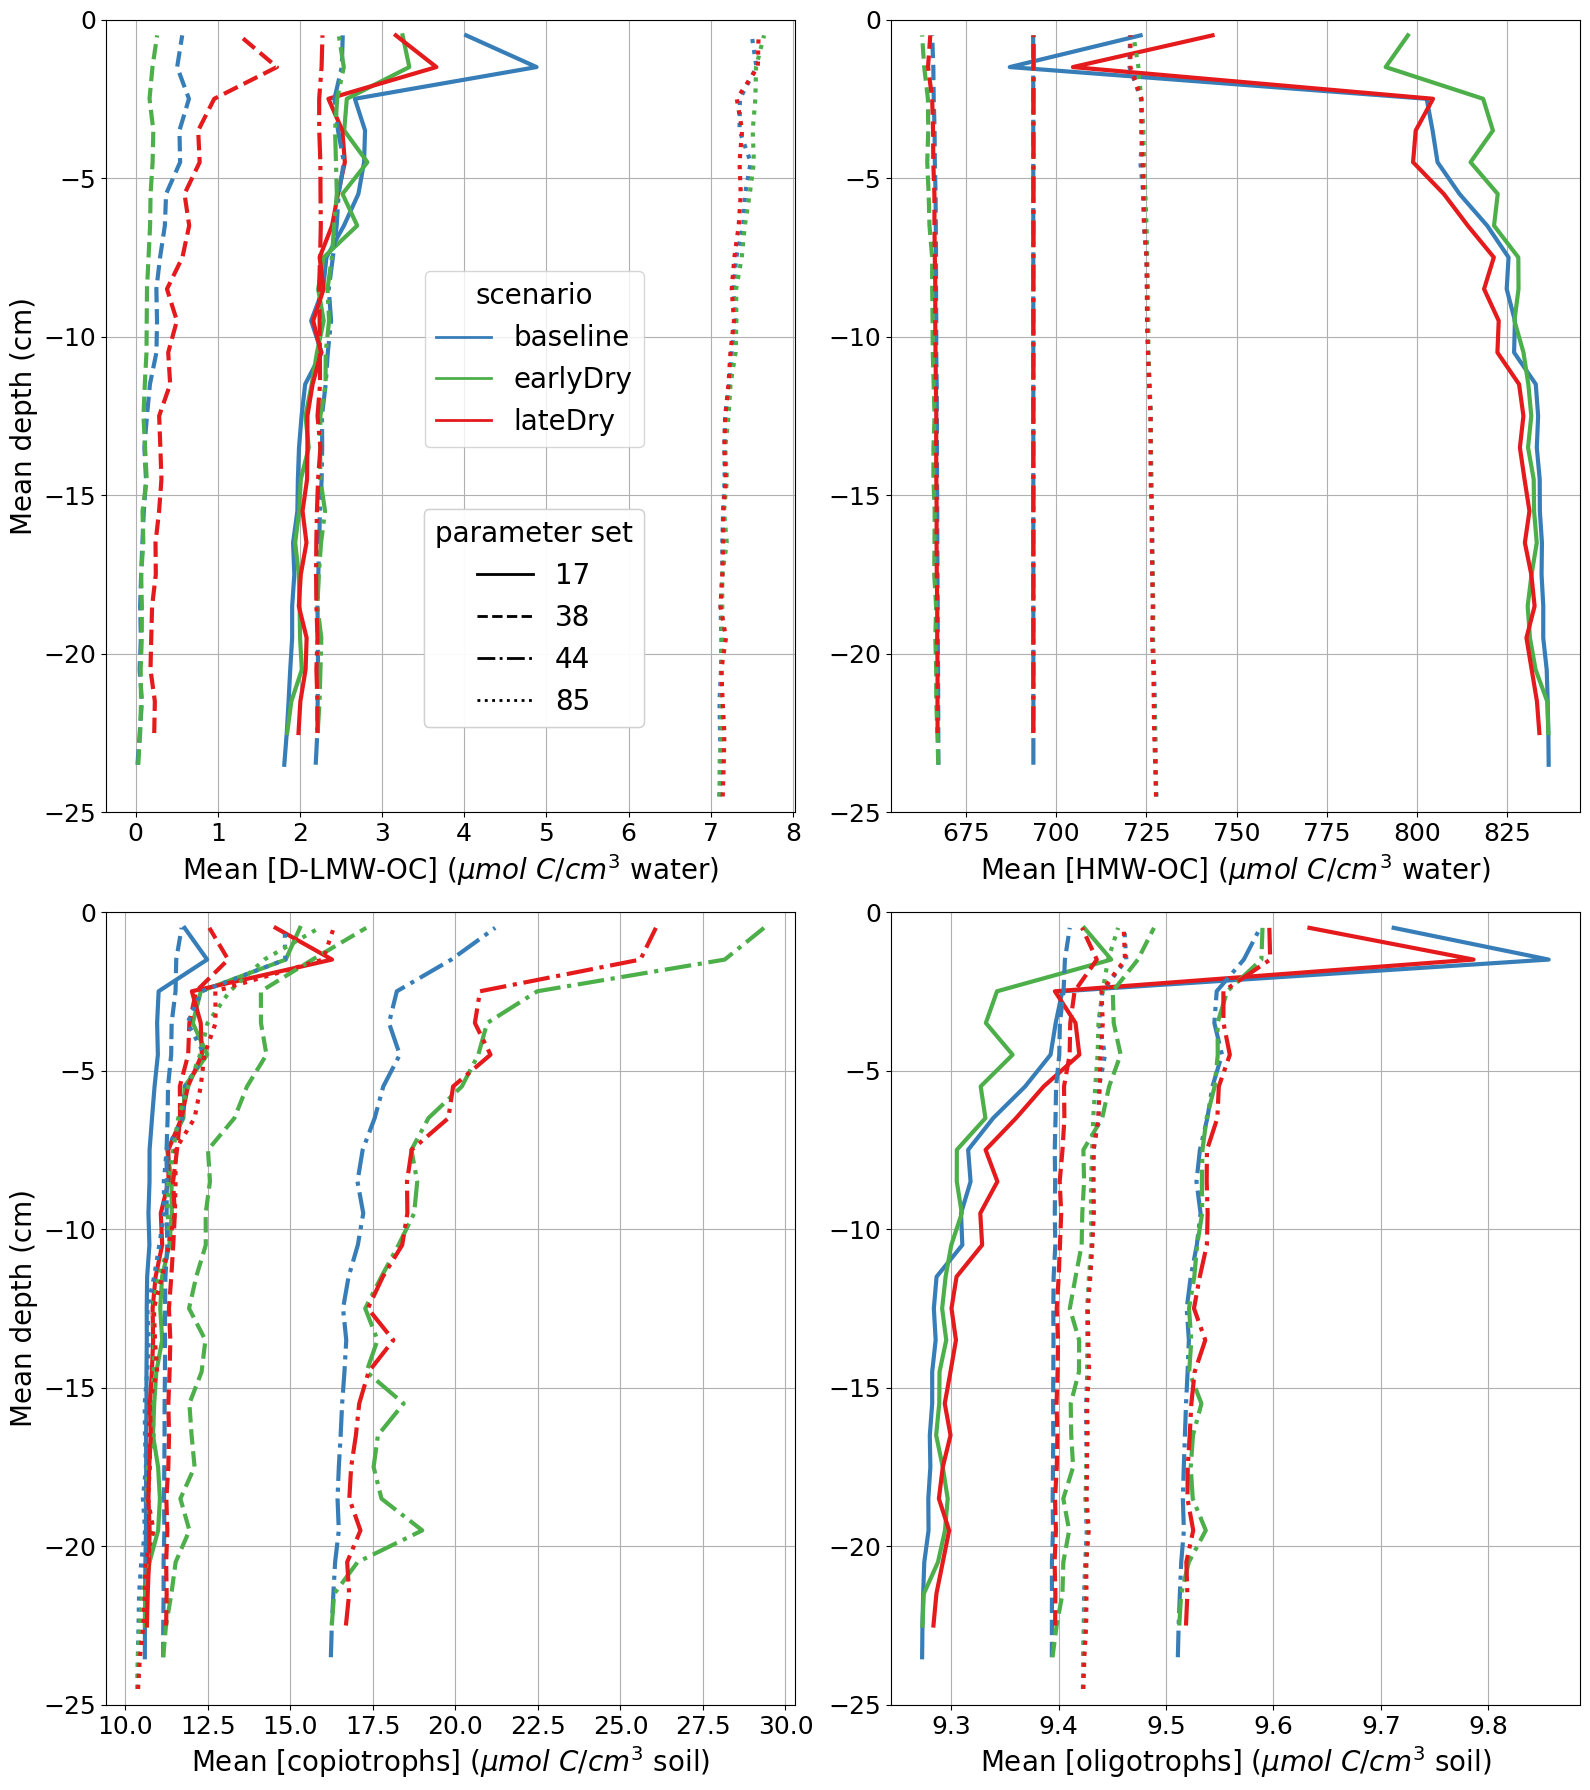

In [8]:
idsplot = [1,2,3,4]
units = [ '$\mu mol~C/cm^3$ water','$\mu mol~C/cm^3$ water','$\mu mol~C/cm^3$ soil','$\mu mol~C/cm^3$ soil']
xlabels = {'cs': '[D-LMW-OC]','cl':'[HMW-OC]','co2': '$CO_2$','cc': '[copiotrophs]','co': '[oligotrophs]' }  
titles_ = ["11 days","25 days"]
plt.figure(figsize=(8*2, 6*3))
for nn, depvar in enumerate(['cs','cl','cc','co']): #[11,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    age_ = 25
    bin_and_plot(completedf, 'depth', depvar,#'cc',
                2,2, idsplot[nn],  doLogY=False,  idplotlegend = 1,
                 anchor1=(0.8,0.7), anchor2=(0.8, 0.4),unitChange = 1e6,
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = units[nn],
                xlabels=xlabels,title = None,#titles_[nn],
                ylim = [-25,0]
                 #, xlim = [9e-6,3.2e-5]
                )
#plt.legend()
plt.savefig('valvsdepthcc.png')
plt.show()

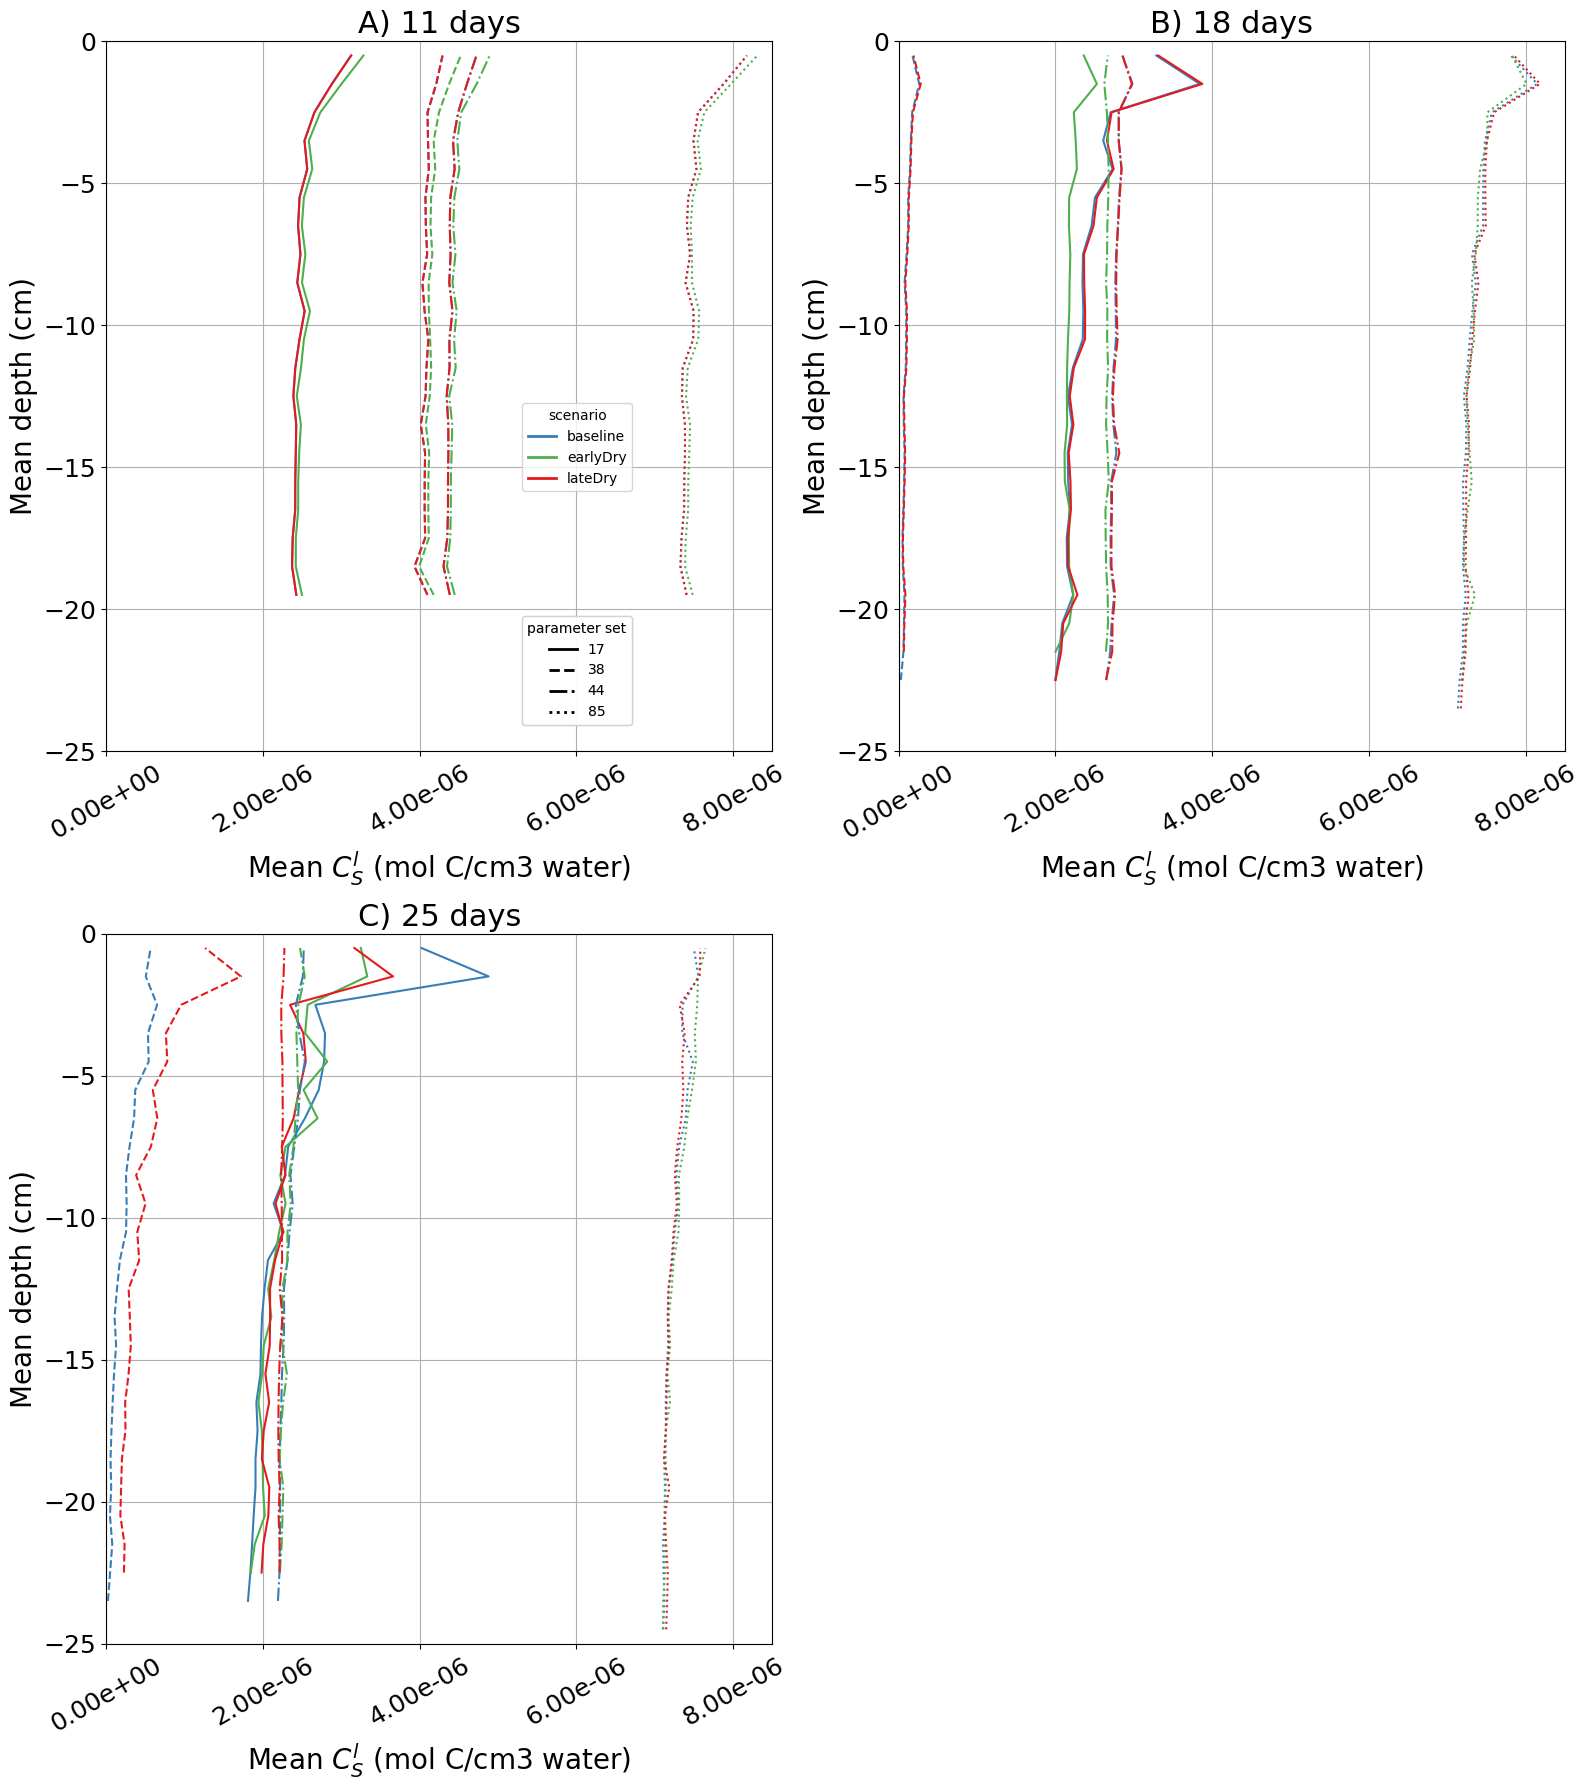

In [331]:
idsplot = [1,2,3]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
titles_ = ["11 days","18 days","25 days"]
plt.figure(figsize=(8*2, 6*3))
for nn, age_ in enumerate([11,18,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', 'cs', 
                2,2, idsplot[nn],  doLogY=False, idplotlegend = 1,
                 anchor1=(0.8,0.5), anchor2=(0.8, 0.2),
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = units[0],
                xlabels=xlabels,title = titles_[nn],
                ylim = [-25,0], xlim = [0,8.5e-6])
    
plt.savefig('valvsdepthCS.png')
plt.show()

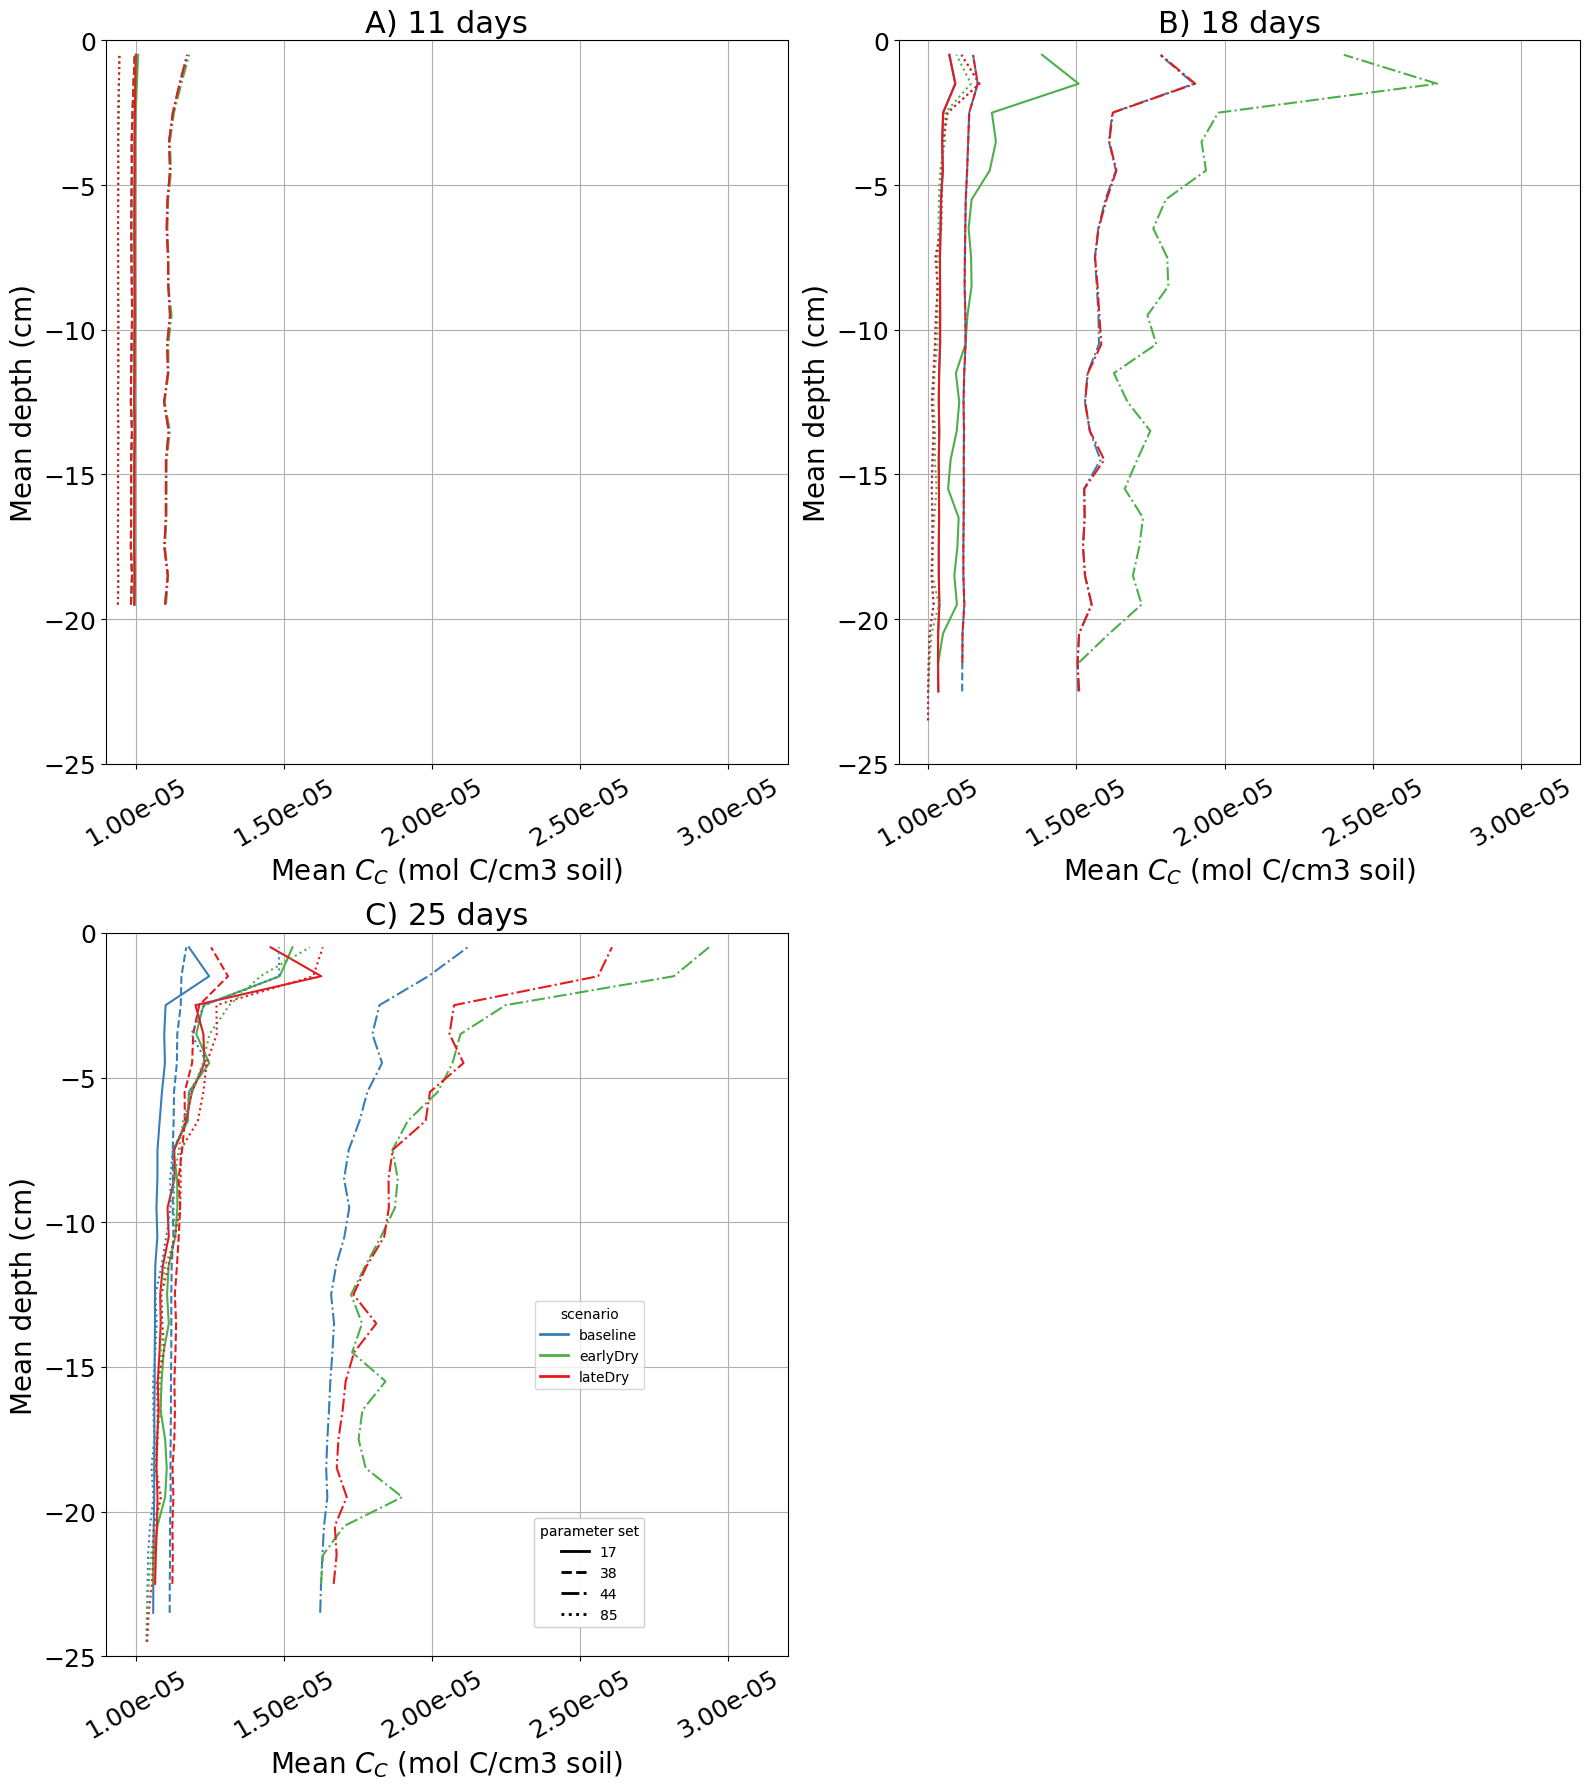

In [332]:
idsplot = [1,2,3]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
titles_ = ["11 days","18 days","25 days"]
plt.figure(figsize=(8*2, 6*3))
for nn, age_ in enumerate([11,18,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', 'cc',
                2,2, idsplot[nn],  doLogY=False,  idplotlegend = 3,
                 anchor1=(0.8,0.5), anchor2=(0.8, 0.2),
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = units[1],
                xlabels=xlabels,title = titles_[nn],
                ylim = [-25,0]
                 , xlim = [9e-6,3.2e-5]
                )
    
plt.savefig('valvsdepthcc.png')
plt.show()

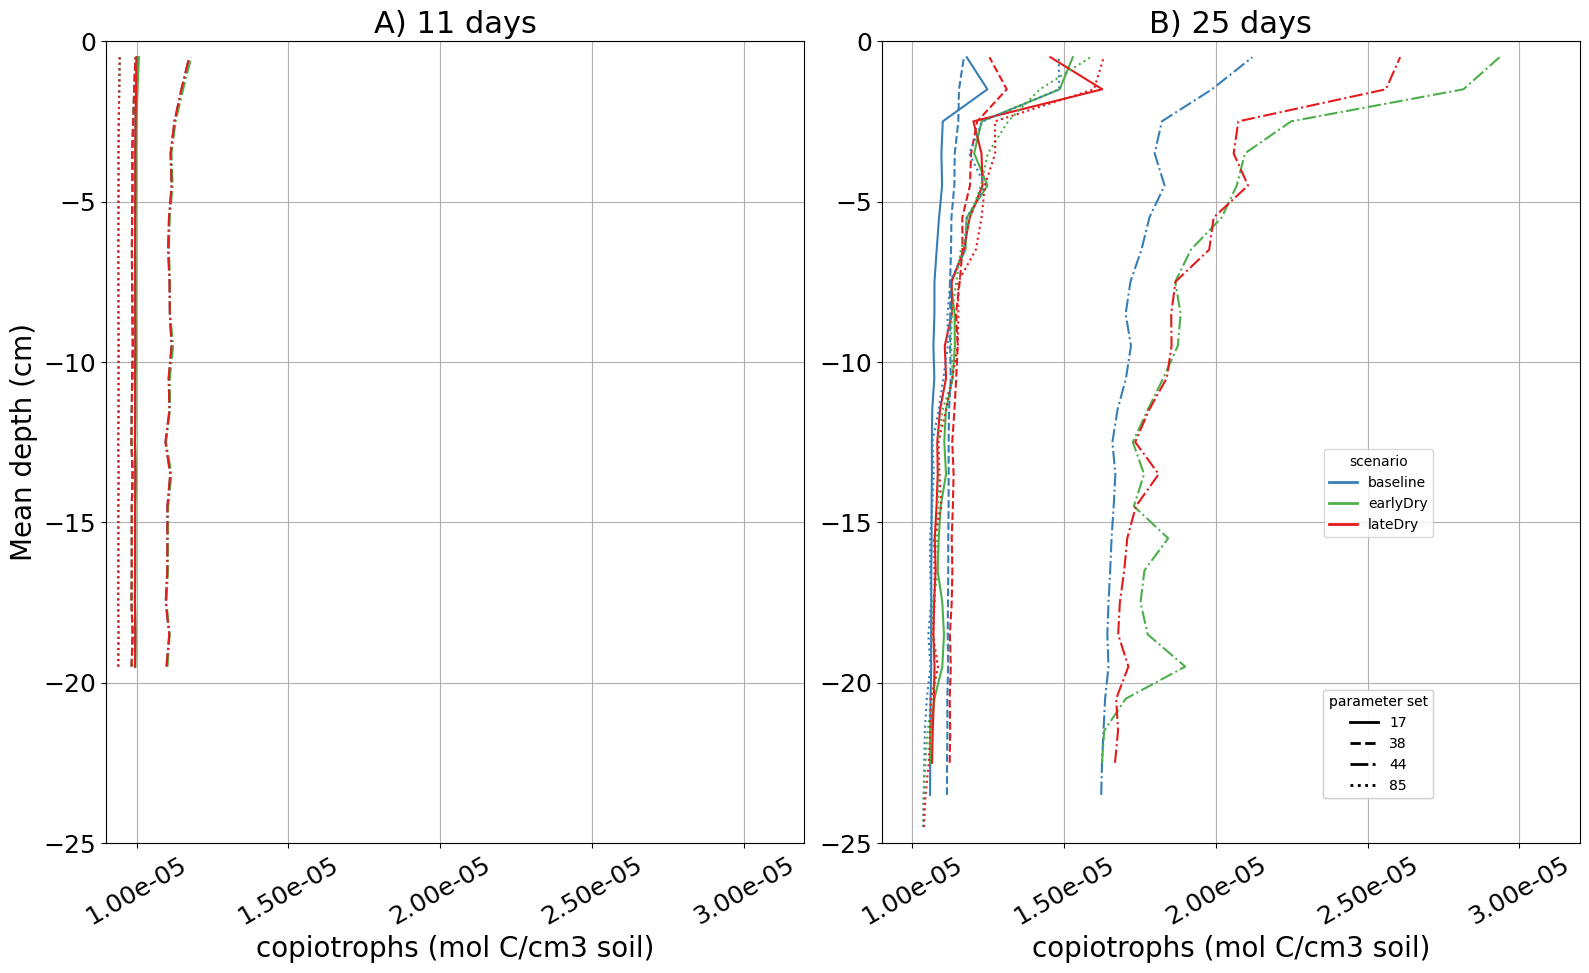

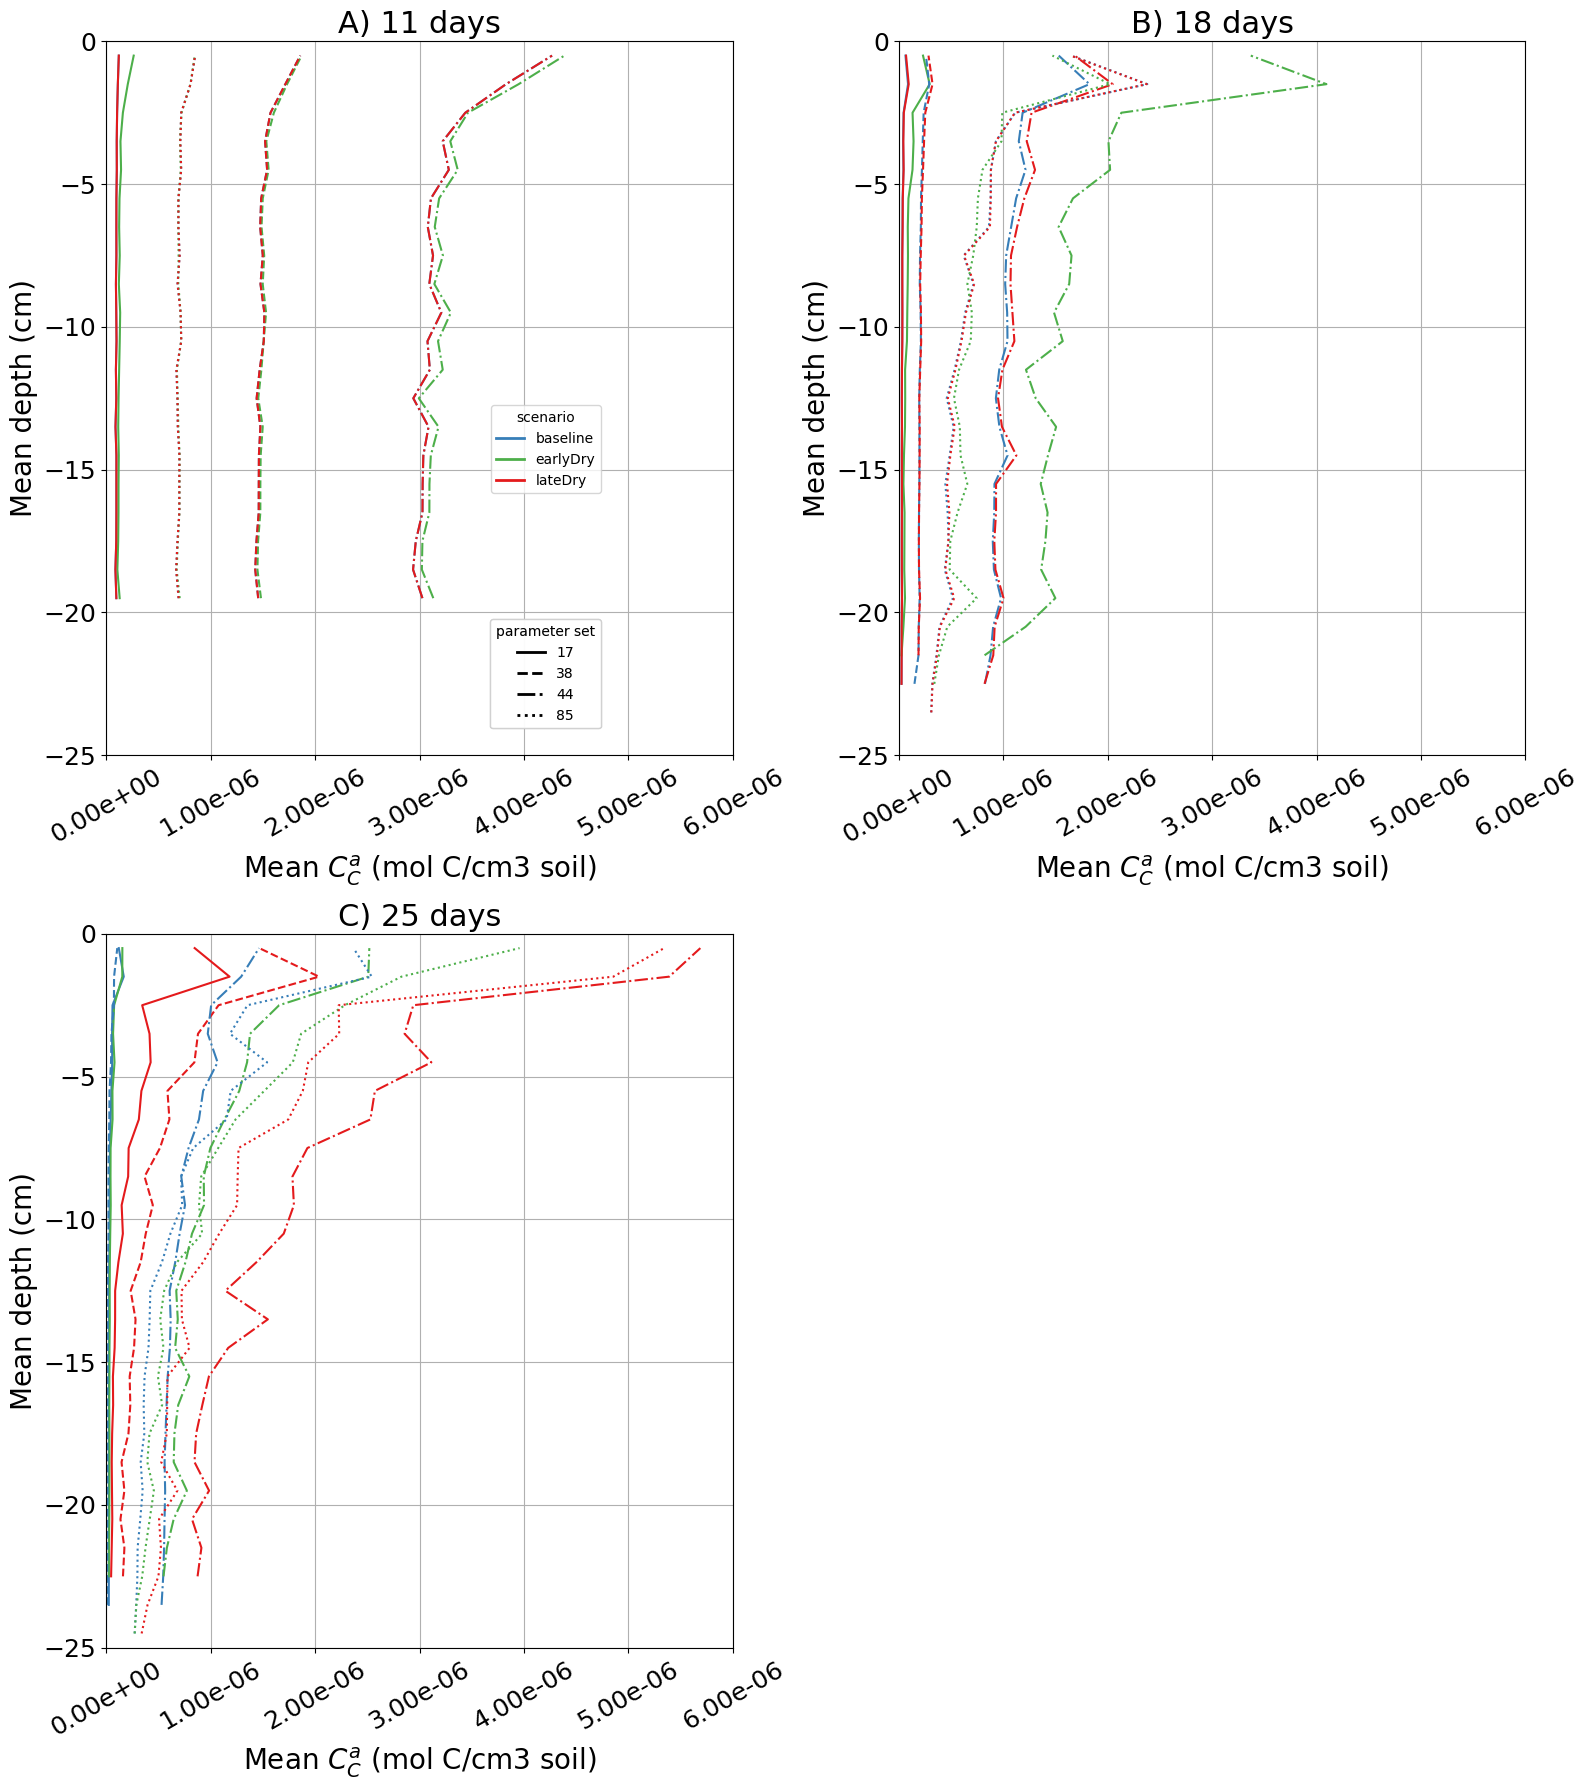

In [333]:
idsplot = [1,2,3]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$',
           'cca': '$C_C^a$','ccd': '$C_C^d$','coa': '$C_O^a$','cod': '$C_O^d$','cl': '$C_L^l$','css': '$C_S^s$'}  
titles_ = ["11 days","18 days","25 days"]
plt.figure(figsize=(8*2, 6*3))
for nn, age_ in enumerate([11,18,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', 'cca', 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = 'mol C/cm3 soil',
                xlabels=xlabels,title = titles_[nn],
                ylim = [-25,0]
                 , xlim = [0,6e-6]
                )
    
plt.savefig('depthvscca.png')
plt.show()

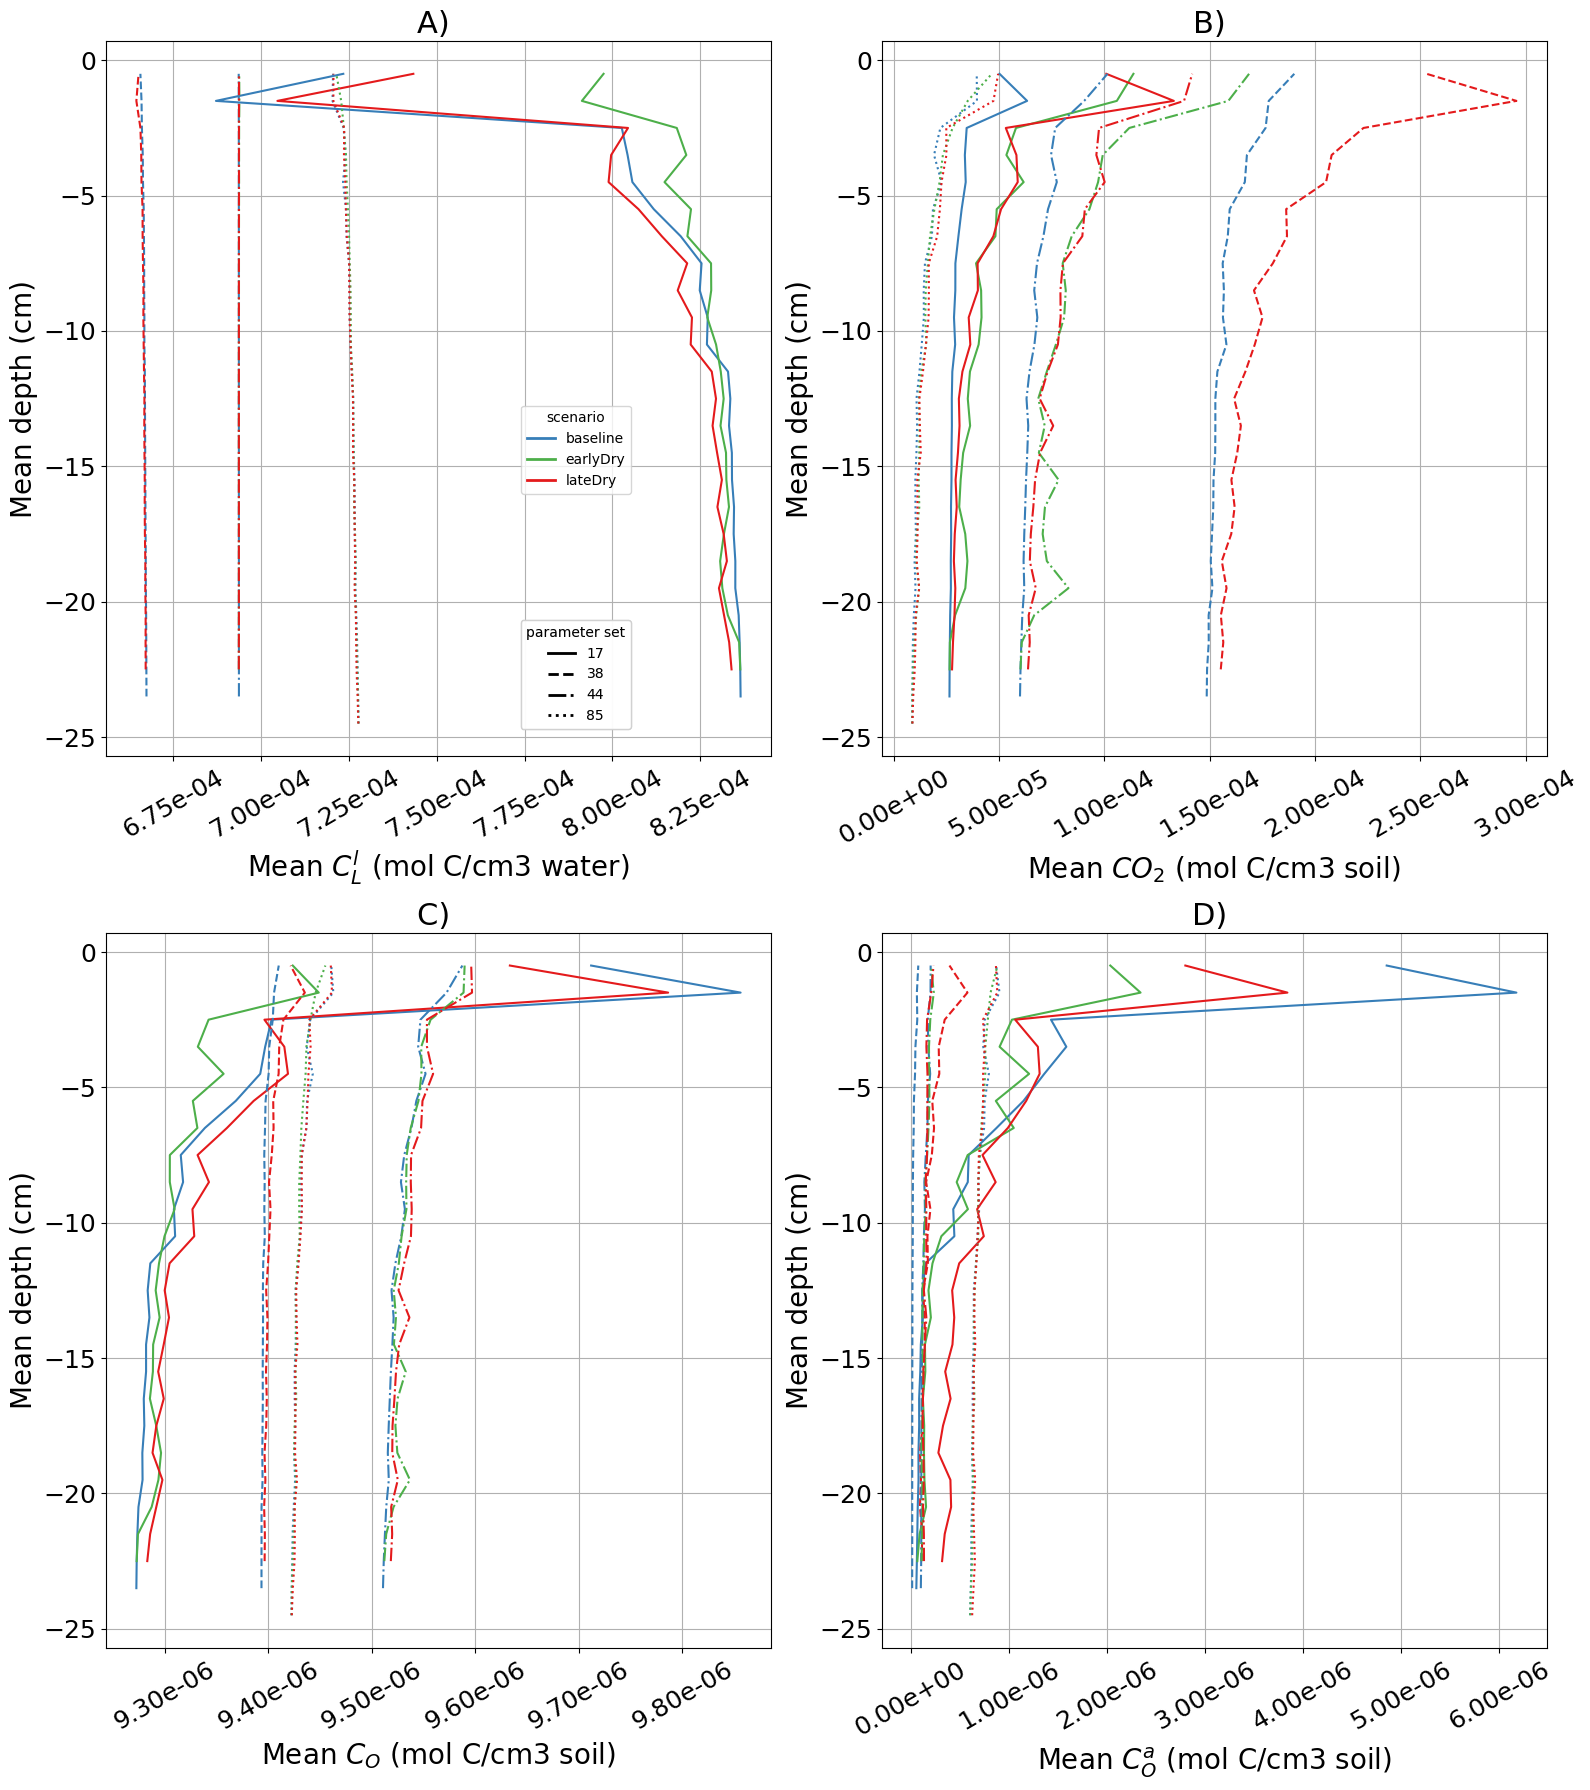

In [330]:

xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$',
           'cca': '$C_C^a$','ccd': '$C_C^d$','coa': '$C_O^a$','cod': '$C_O^d$','cl': '$C_L^l$','css': '$C_S^s$'}  
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cl','co2','co','coa']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', dep, 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age =25,
                 unit = units[nn],
                xlabels=xlabels)
    
plt.savefig('depthvsother.png')
plt.show()

In [ ]:
idsplot = [1,2,3]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
titles_ = ["11 days","18 days","25 days"]
plt.figure(figsize=(8*2, 6*3))
for nn, age_ in enumerate([11,18,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', 'cs', 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = units[nn],
                xlabels=xlabels,titles = titles_,
                ylim = [-25,0], xlim = [0,8.5e-6])
    
#plt.savefig('valvsdepth.png')
plt.show()

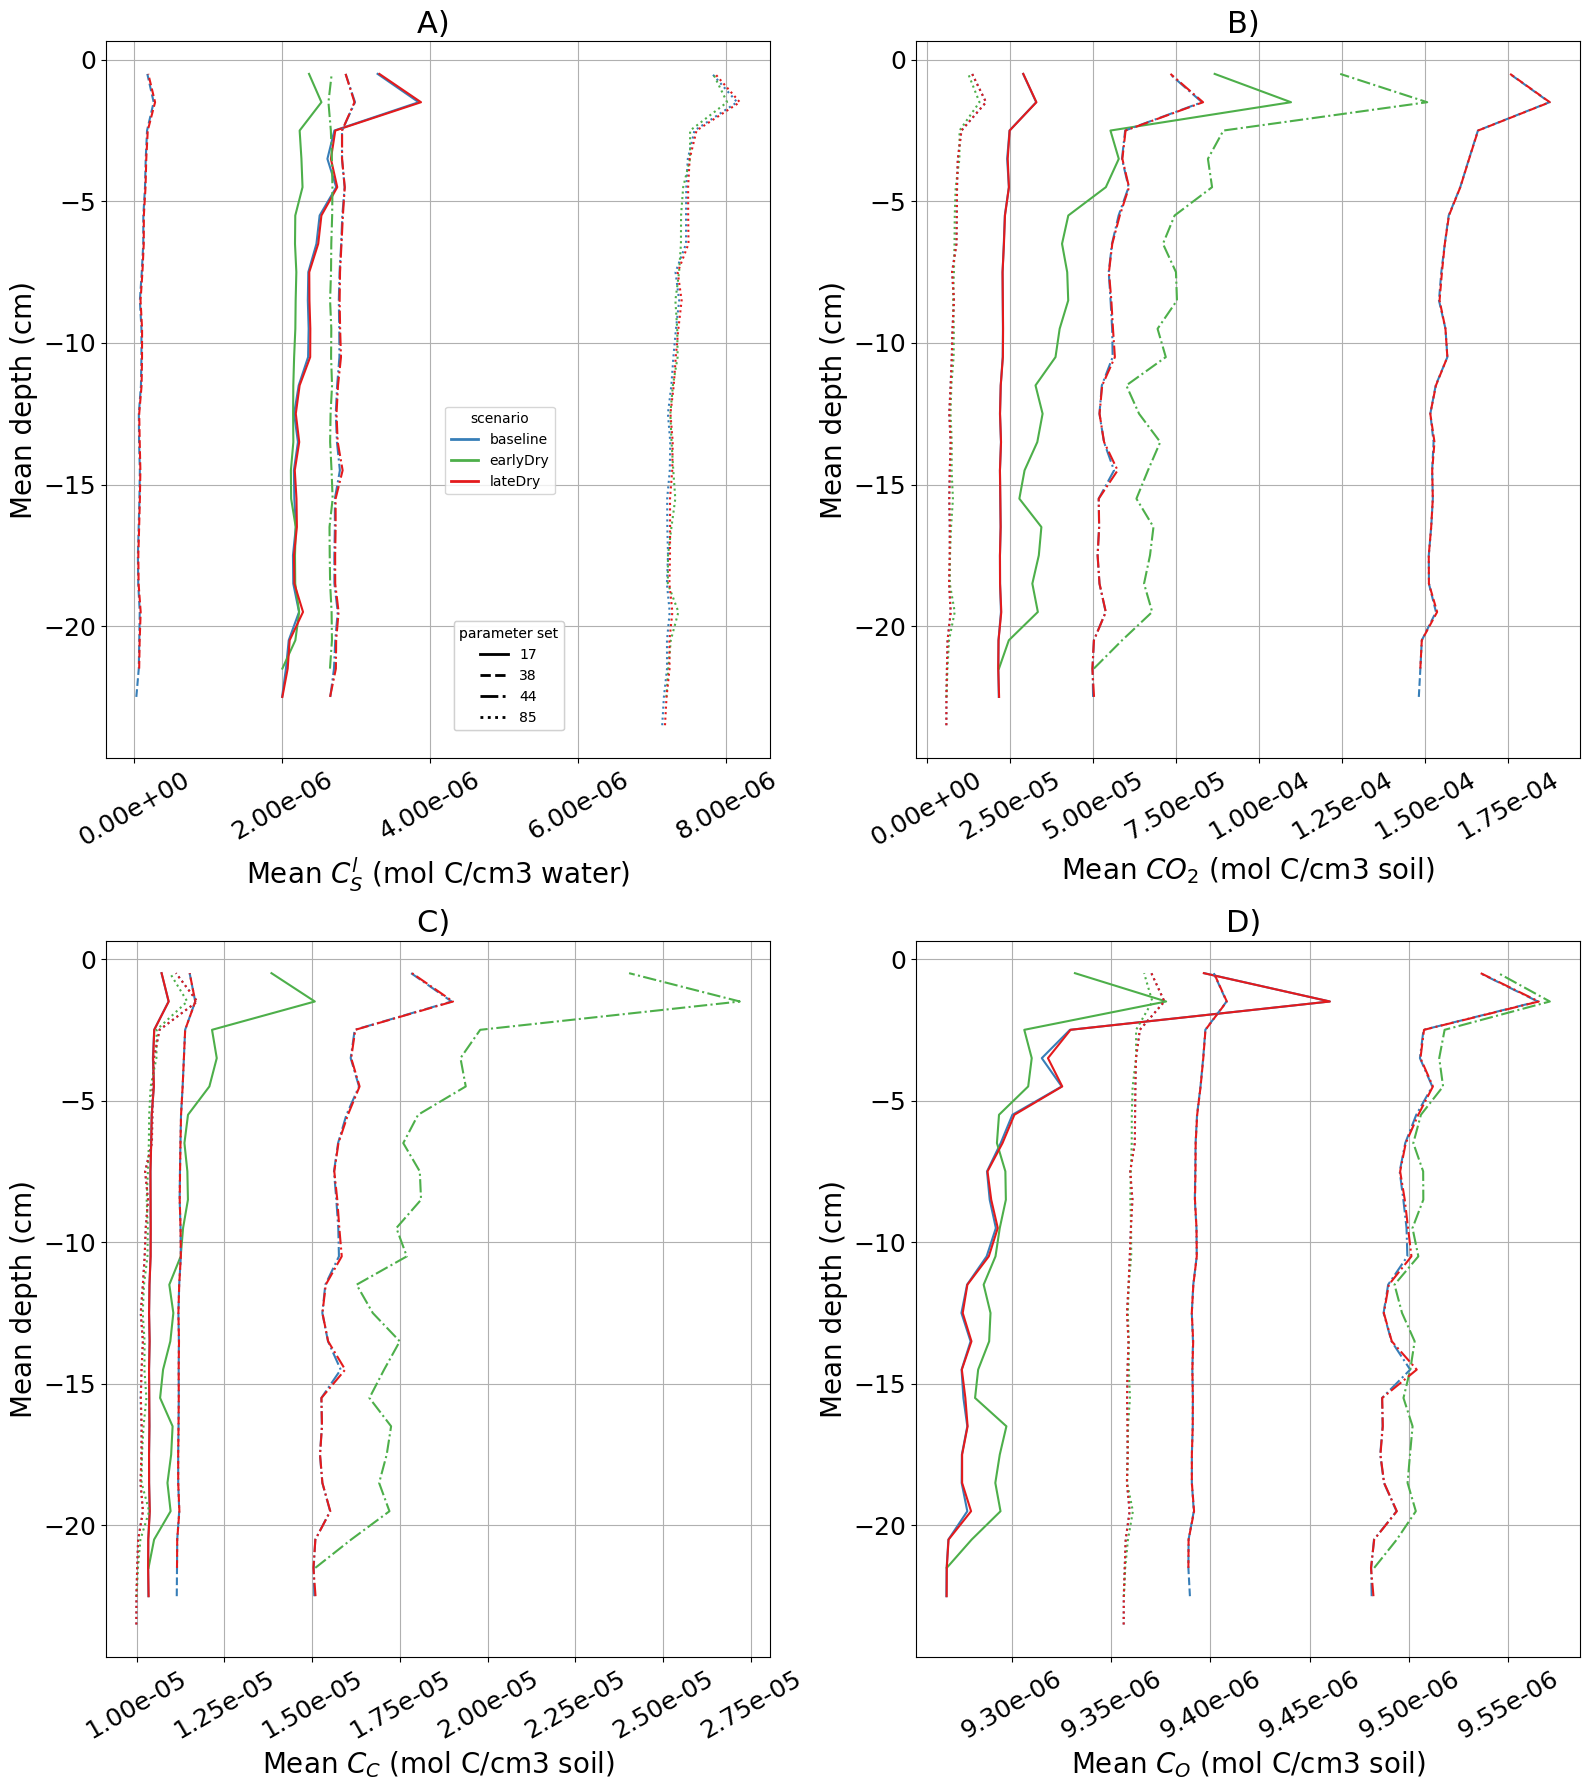

In [270]:
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', dep, 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age =18,
                 unit = units[nn],
                xlabels=xlabels)
    
plt.savefig('valvsdepth.png')
plt.show()

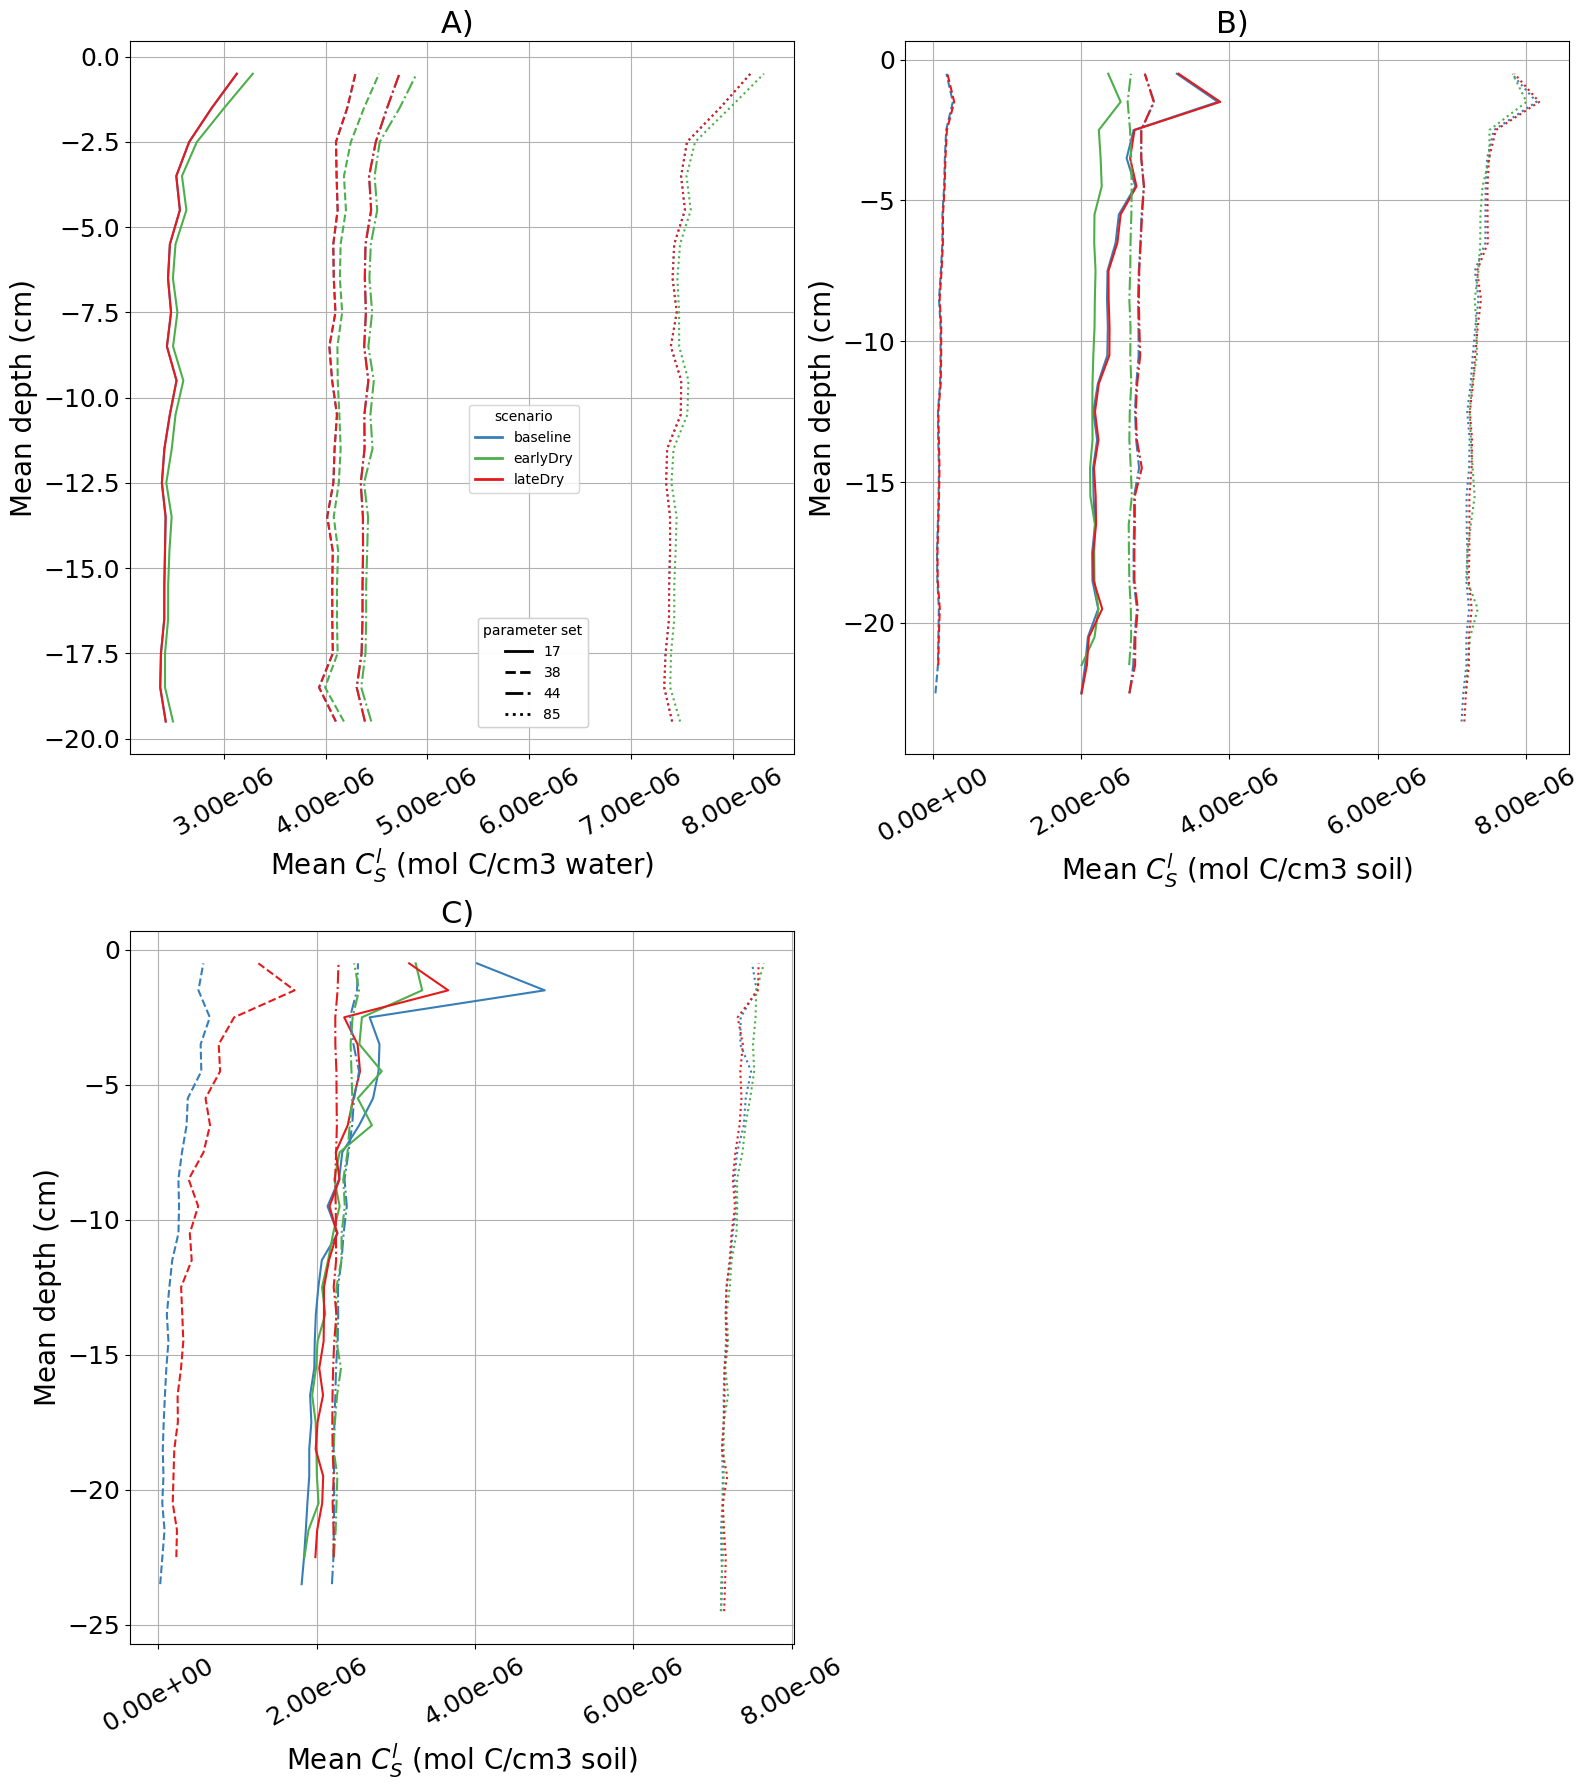

In [271]:
idsplot = [1,2,3]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, age_ in enumerate([11,18,25]):#['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', 'cs', 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = age_,
                 unit = units[nn],
                xlabels=xlabels,
                ylim = [-25,0], xlim = [0,8.1e-6])
    
plt.savefig('valvsdepth.png')
plt.show()

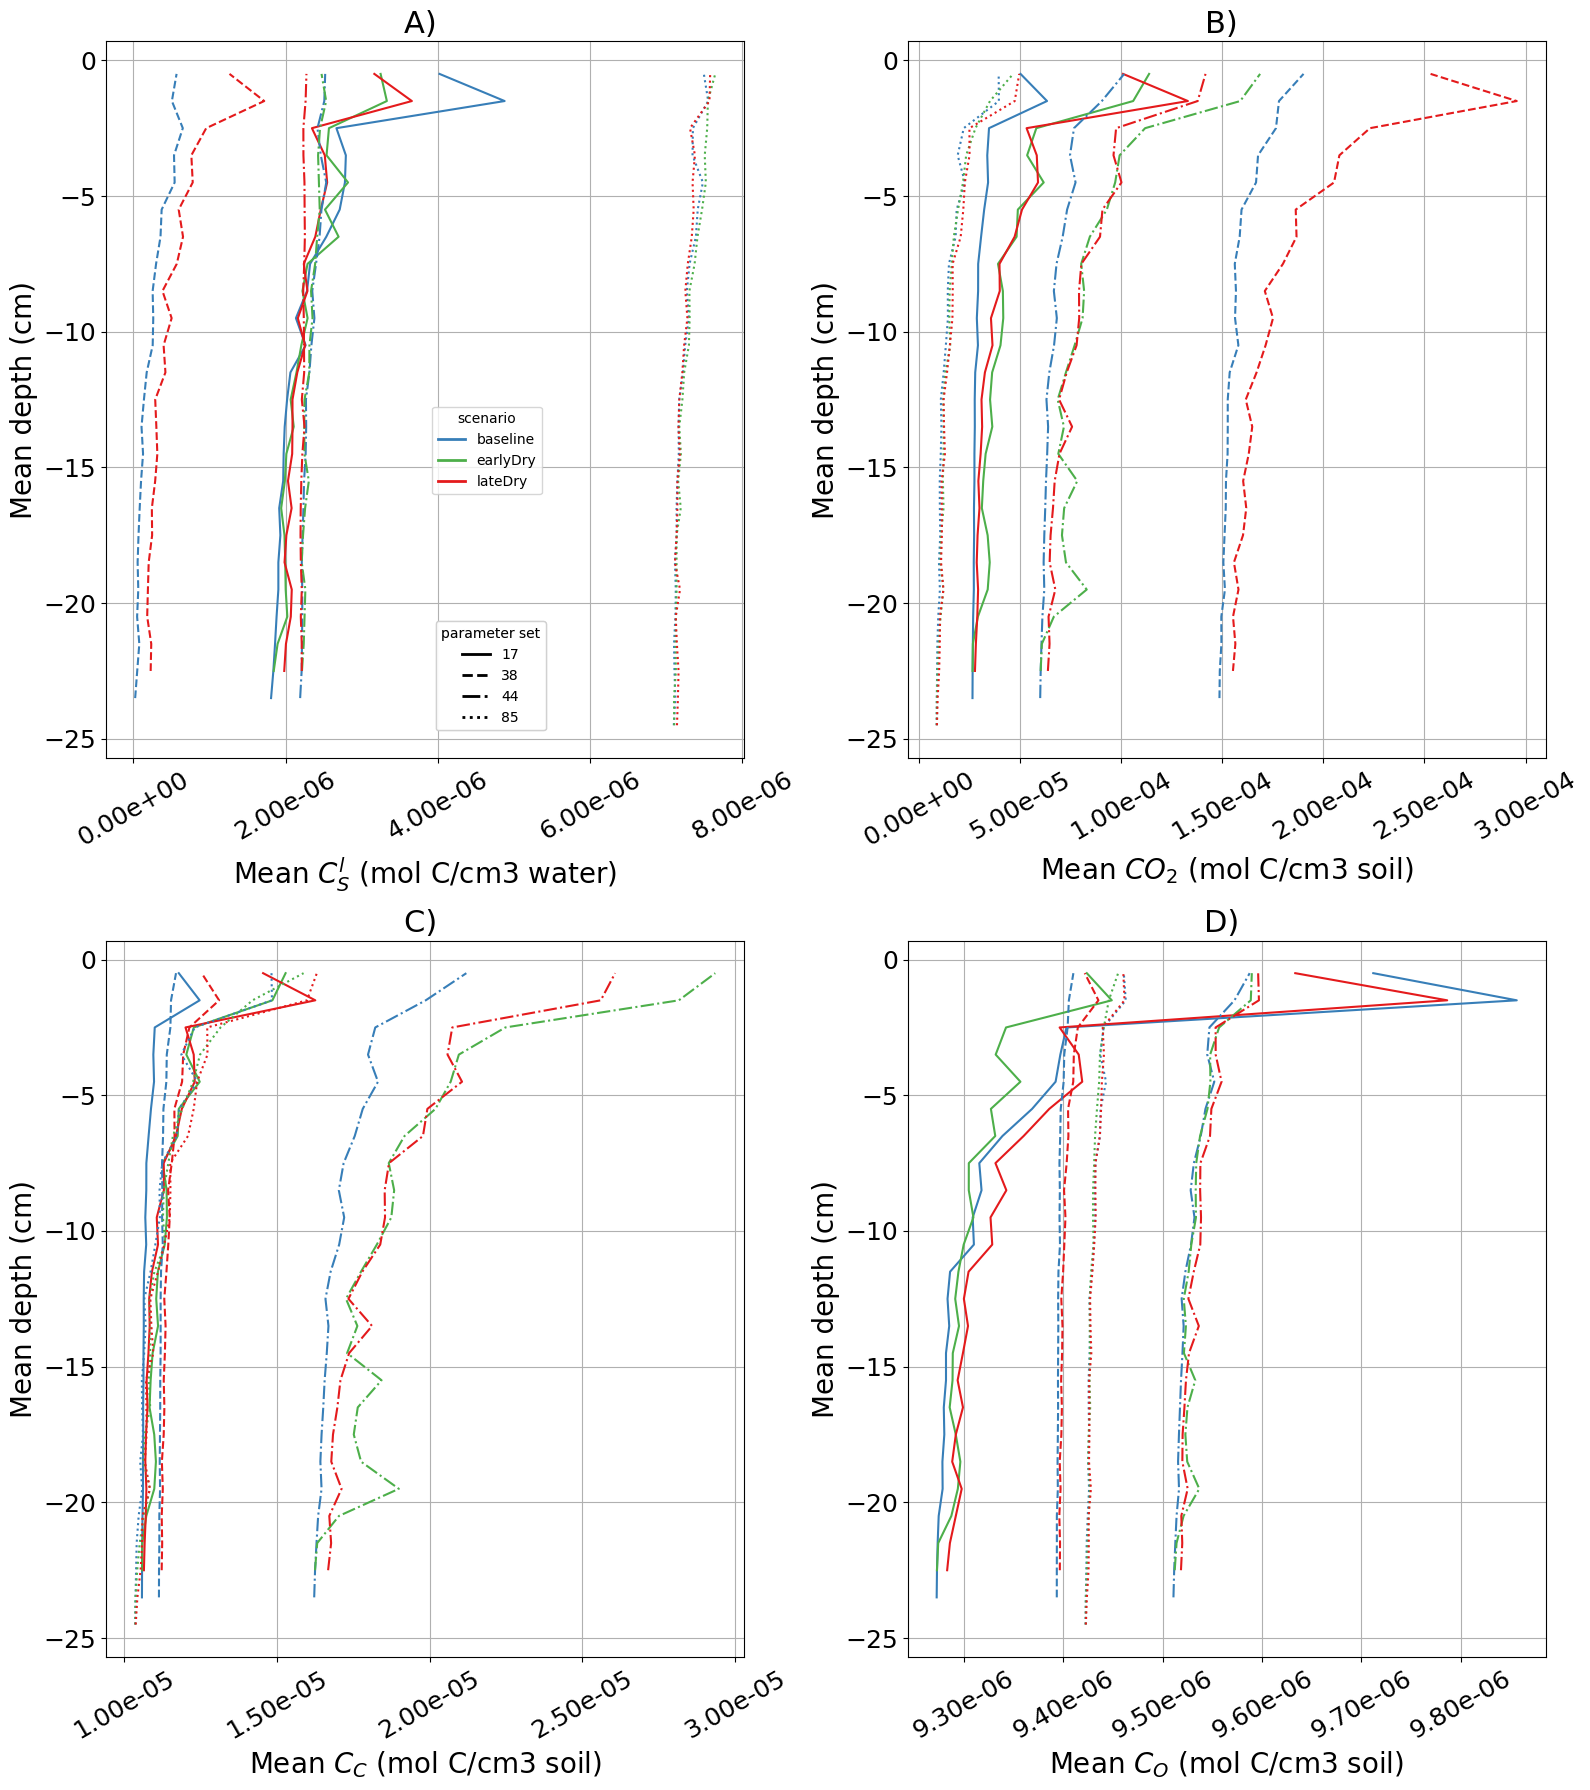

In [262]:

idsplot = [1,2,3,4]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', dep, 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 age = 25,
                 unit = units[nn],
                xlabels=xlabels)
    
plt.savefig('valvsdepth.png')
plt.show()

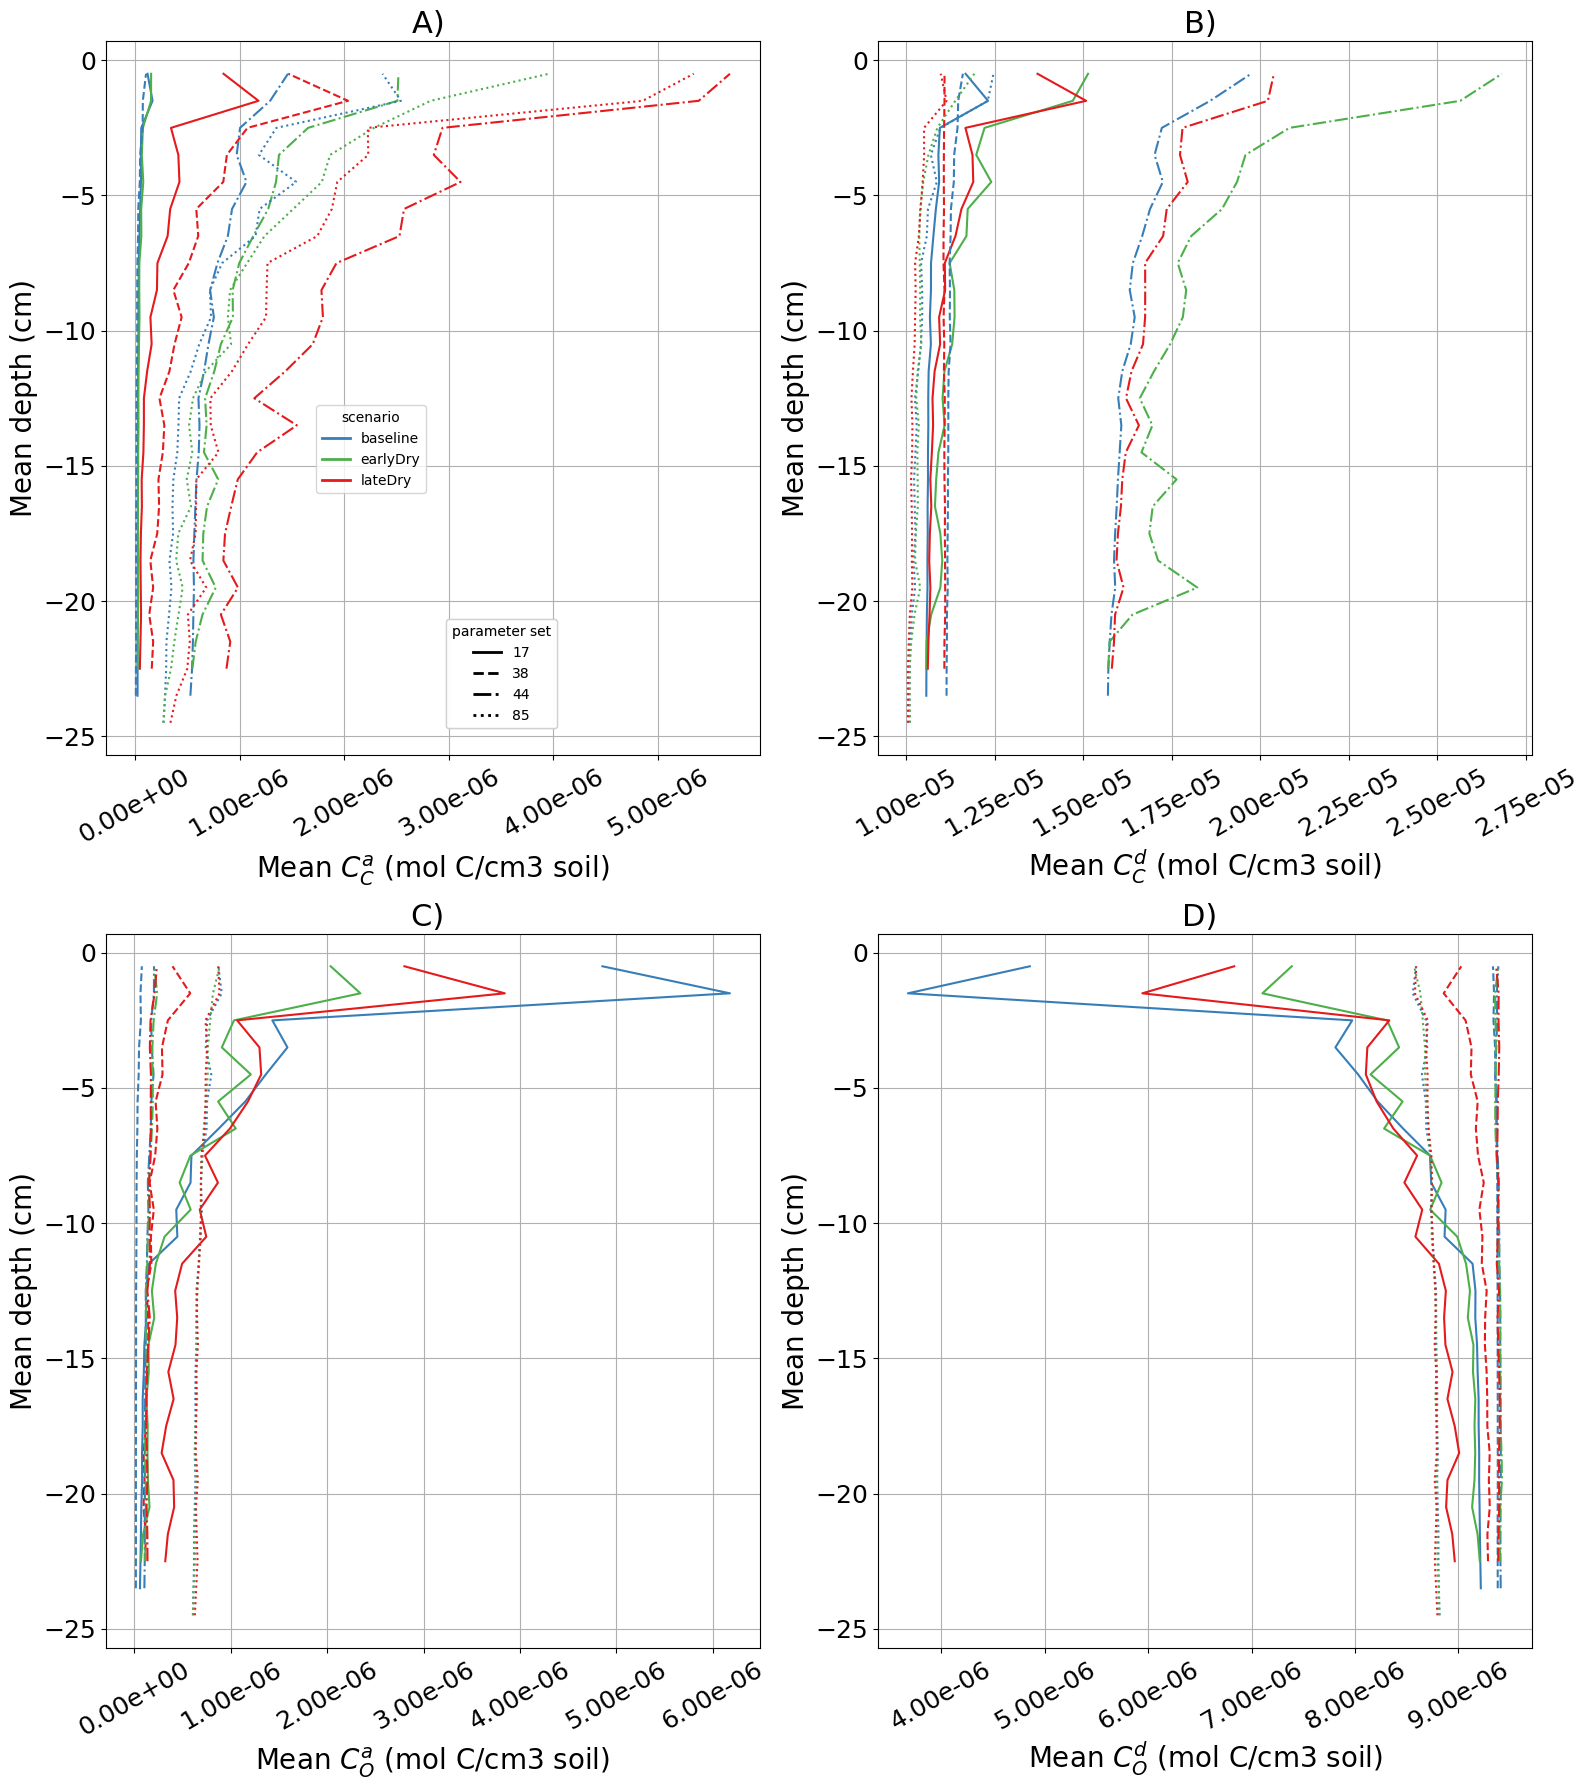

In [265]:

idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cca': '$C_C^a$','ccd': '$C_C^d$','coa': '$C_O^a$','cod': '$C_O^d$','cl': '$C_L^l$','css': '$C_S^s$'}  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cca','ccd','coa','cod']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', dep, 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 unit = units[nn],
                xlabels=xlabels)
    
plt.savefig('valvsdepth2.png')
plt.show()

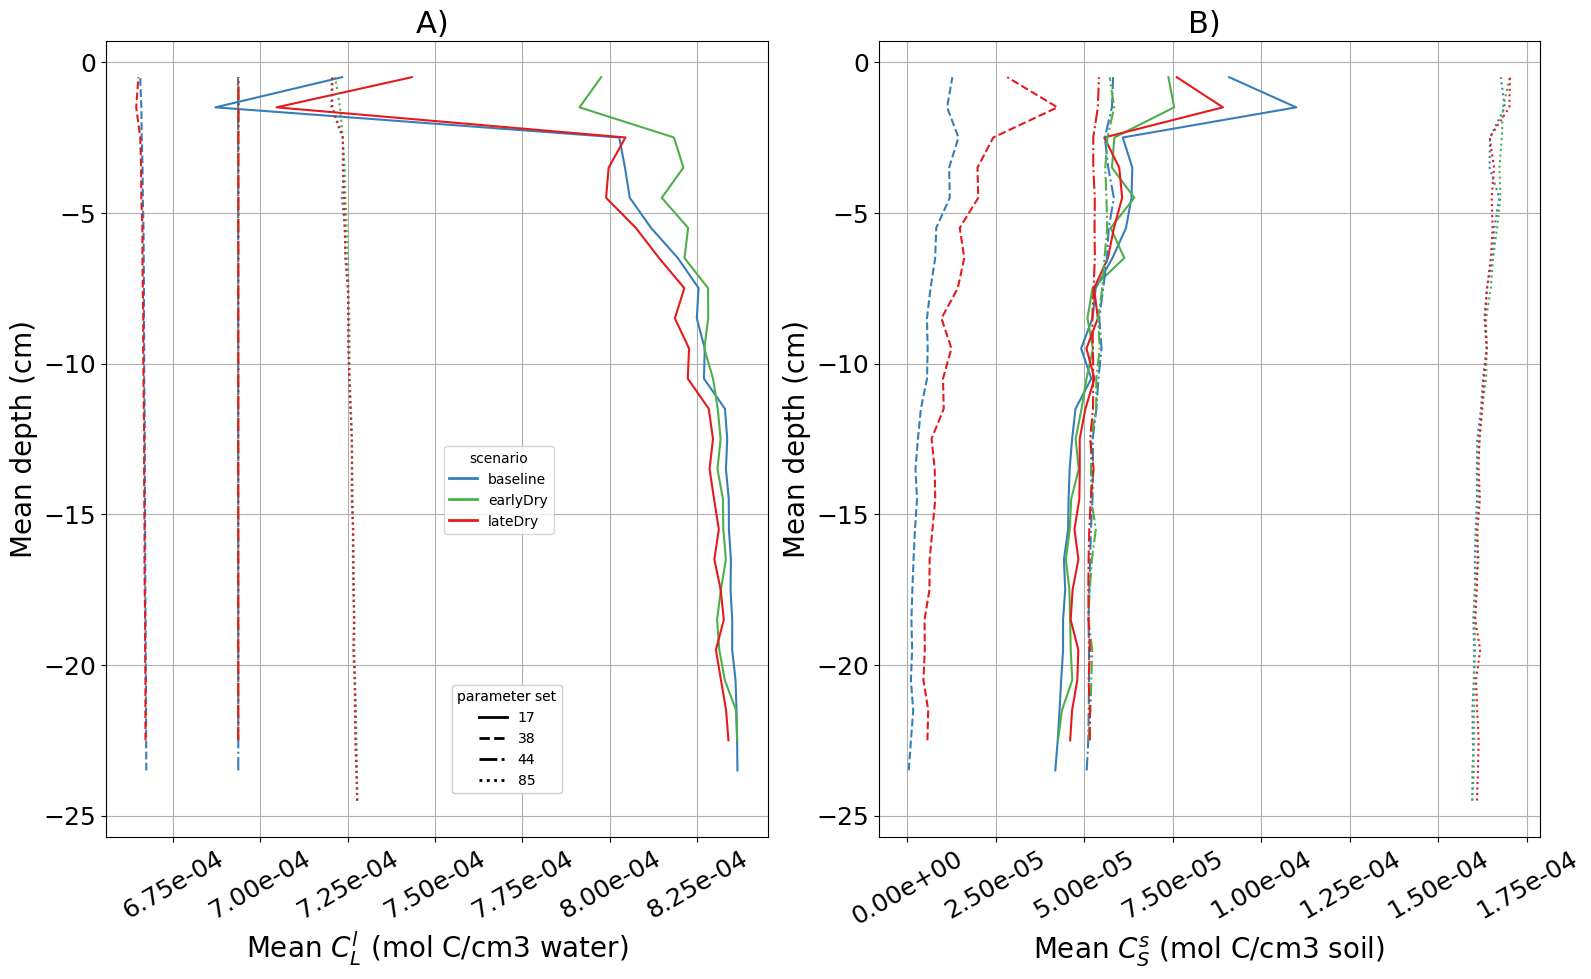

In [263]:

idsplot = [1,2]
units = [ 'mol C/cm3 water','mol C/cm3 soil']
xlabels = {'cl': '$C_L^l$','css': '$C_S^s$'}  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cl','css']): #(['CHl','css','cs_/css']):
    bin_and_plot(completedf, 'depth', dep, 
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 #colVar= colvars, 
                 unit = units[nn],
                xlabels=xlabels)
    
plt.savefig('valvsdepth3.png')
plt.show()

In [ ]:
plt.figure()
#def bin_and_plot(dataframe, independent_variable, dependent_variable, 
#                 nrows, ncols, indexsubplot, unit=None, doLogX=False,
#                 doLogY=False, colVar = None, xlabels=None):

xlabels = {'cs': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
bin_and_plot(completedf, 'depth', "cs", 
            1,1, 1,  doLogY=False, 
             #doLogX=True, 
             unit = "mol/cm3 water",
            xlabels=xlabels)
plt.show()

In [347]:
def bintime_(dataframe, independent_variable, dependent_variable):
    
    if dependent_variable in ['cs', 'cl']:
        vol = "theta" # enough becose volume is 1cm3
    else:
        vol = "volscv"
    dataframe[dependent_variable+"_"]=dataframe[dependent_variable]*dataframe[vol]
    grouped = dataframe.groupby(dataframe[independent_variable])

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()
    bin_meansX = (grouped[dependent_variable+"_"]).sum()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plottime(dataframe, independent_variable, dependent_variable,                  
                 nrows, ncols, indexsubplot,age = 25,idplotlegend=1,anchor1=(0.8,0.5), anchor2=(0.8, 0.2),
                 mysets = None,unit=None, doLogX=False,xlim = None, ylim = None,title = None,
                 doLogY=False, colVar = None, xlabels=None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    #plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    if mysets is None:
        mysets = dataframe["simulation"].unique()
        mysets.sort()
    #print('ames',max( dataframe[dataframe['pSet'] in np.array(mysets)][dependent_variable]))
    for i in mysets:
        df_ = dataframe[(dataframe['simulation']==i)  & (dataframe['gotR'])].copy()
        if len(df_) > 0:
            bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable)
            if colVar is None:
                plt.subplot(nrows, ncols, indexsubplot).plot(  bin_meansZ,bin_meansX.values,
                         #label=f'{i}',
                         c=c_styles[df_['scenario'].unique()[0]],
                         linestyle=l_styles[df_['pSet'].unique()[0]]
                        )
            else:
                raise Exception
                
    # Color legend
    color_legend_elements = [
        Line2D([0], [0], color=c_styles['baseline'], lw=2, label='baseline'),
        Line2D([0], [0], color=c_styles['earlyDry'], lw=2, label='earlyDry'),
        Line2D([0], [0], color=c_styles['lateDry'], lw=2, label='lateDry')
    ]

    # Line style legend
    linestyle_legend_elements = [
        Line2D([0], [0], color='black', linestyle=l_styles[17], lw=2, label=17),
        Line2D([0], [0], color='black', linestyle=l_styles[38], lw=2, label=38),
        Line2D([0], [0], color='black', linestyle=l_styles[44], lw=2, label=44),
        Line2D([0], [0], color='black', linestyle=l_styles[85], lw=2, label=85)
    ]


    if unit is None:
        unit = 'mol/cm3'
    
    plt.subplot(nrows, ncols, indexsubplot).set_xlabel('time (d)', fontsize=20)
    #plt.subplot(nrows, ncols, indexsubplot).set_yticks(fontsize=18)

    # Set tick label font size
    plt.subplot(nrows, ncols, indexsubplot).tick_params(axis='both', which='major', labelsize=18)
    #plt.subplot(nrows, ncols, indexsubplot).tick_params(axis='x', which='major', labelrotation=30, labelsize=18)

    if xlabels is None:
        plt.subplot(nrows, ncols, indexsubplot).set_ylabel('Mean ' + dependent_variable+' ('+unit+')', fontsize=20)
    else:
        
        plt.subplot(nrows, ncols, indexsubplot).set_ylabel(xlabels[dependent_variable]+' ('+unit+')', fontsize=20)# 'Mean ' +
    if xlim is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_xlim(xlim[0],xlim[1])
    if ylim is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_ylim(ylim[0],ylim[1])

    # Set x-axis to scientific format
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    plt.subplot(nrows, ncols, indexsubplot).yaxis.set_major_formatter(formatter)
    plt.subplot(nrows, ncols, indexsubplot).ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    plt.subplot(nrows, ncols, indexsubplot).yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2e}'))


    #plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    #plt.subplot(nrows, ncols, indexsubplot).gca().set_xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    if doLogY:
        plt.subplot(nrows, ncols, indexsubplot).set_yscale('log')
    if doLogX:
        plt.subplot(nrows, ncols, indexsubplot).set_xscale('log')
    if colVar is not None:
        plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
    else:
        #if title is not None:
        #    plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") "+title, fontsize=22)#+colVar)
        #else:
        #    plt.subplot(nrows, ncols, indexsubplot).set_title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
        if indexsubplot == idplotlegend:
            #plt.legend()#loc="lower right")#, fontsize=22)
            plt.subplot(nrows, ncols, indexsubplot).legend(handles=color_legend_elements, title='scenario')#, loc='upper center')
            plt.subplot(nrows, ncols, indexsubplot).legend(handles=linestyle_legend_elements, title='parameter set')#, loc='lower center')

            # Add the original legends back to the plot
            plt.subplot(nrows, ncols, indexsubplot).add_artist(plt.legend(handles=color_legend_elements, title='scenario',bbox_to_anchor=anchor1, frameon=False))
            plt.subplot(nrows, ncols, indexsubplot).add_artist(plt.legend(handles=linestyle_legend_elements, title='parameter set',bbox_to_anchor=anchor2, frameon=False))
            #pass
    plt.subplot(nrows, ncols, indexsubplot).grid(True)
    
    plt.tight_layout()
    

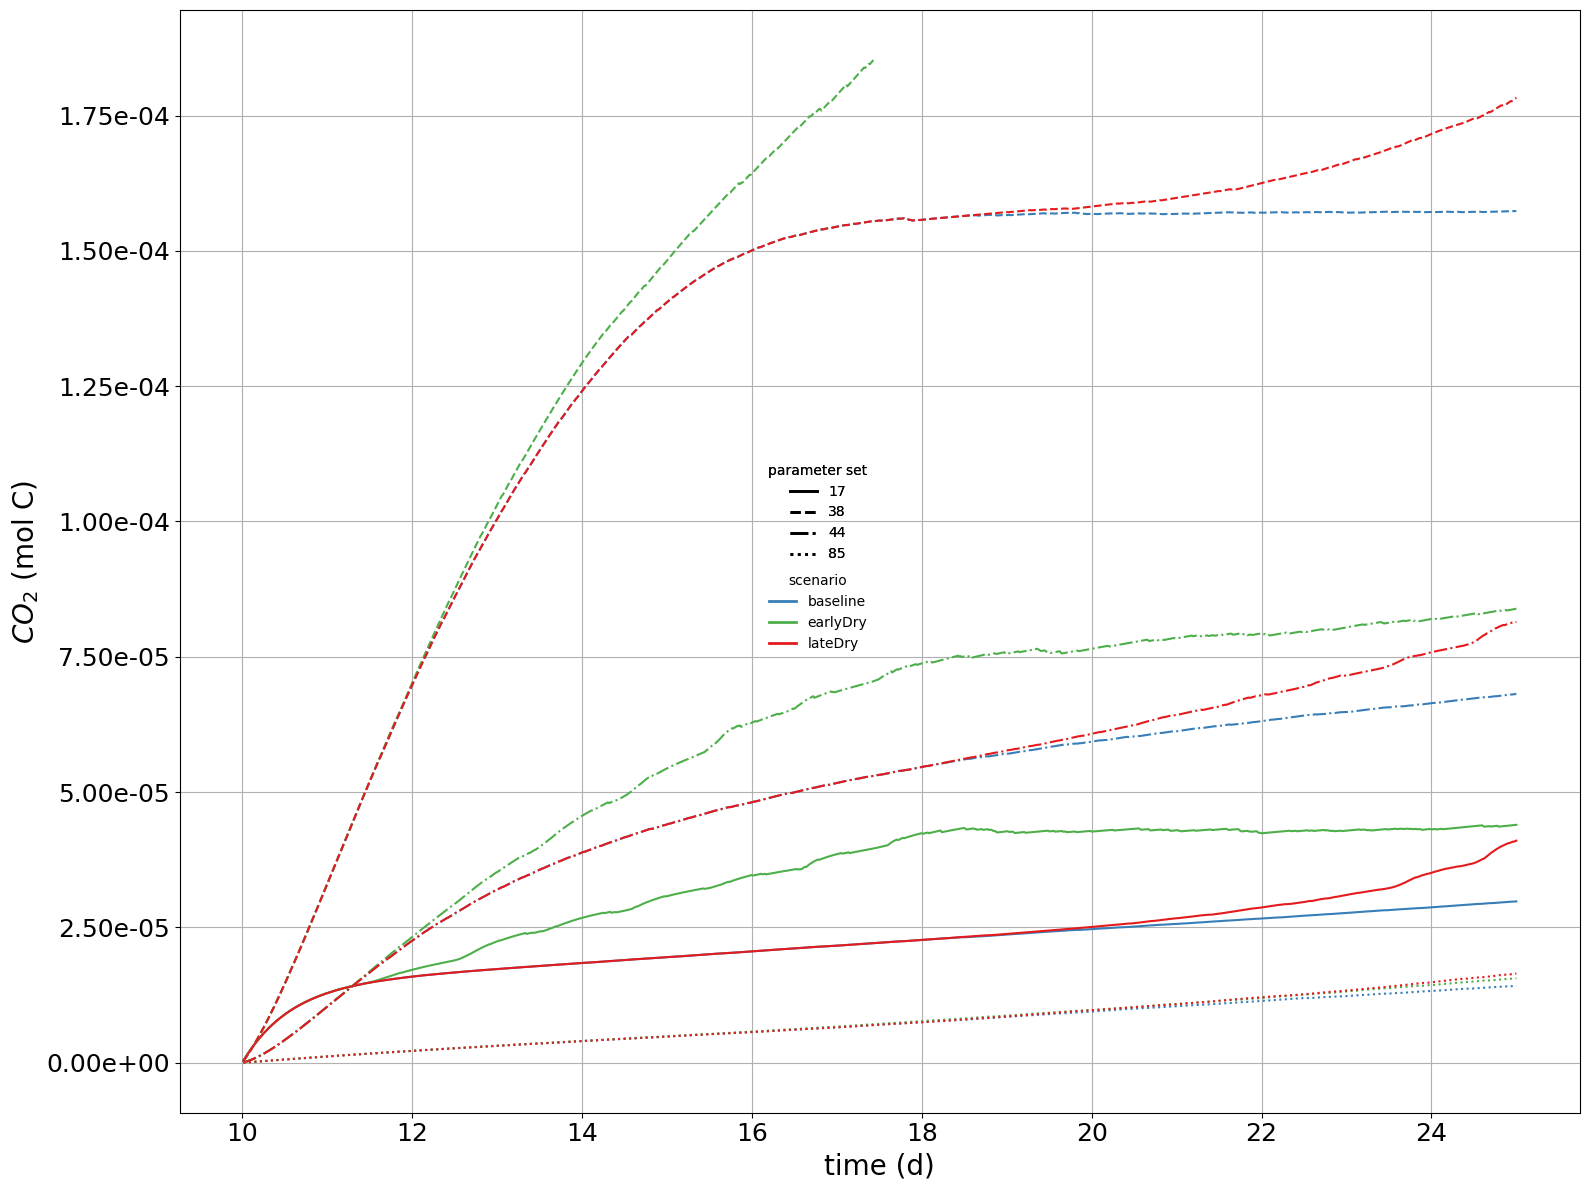

In [348]:

xlabels = {'co2': '$CO_2$'}  
plt.figure(figsize=(8*2, 6*2))
bin_and_plottime(completedf, 'time', 'co2', 
            1,1,1,  doLogY=False,anchor1=(0.5,0.5), anchor2=(0.5, 0.6), 
             #doLogX=True, 
             #colVar= colvars, 
             unit = 'mol C',
            xlabels=xlabels)
    
plt.savefig('co2vstime.png')
plt.show()

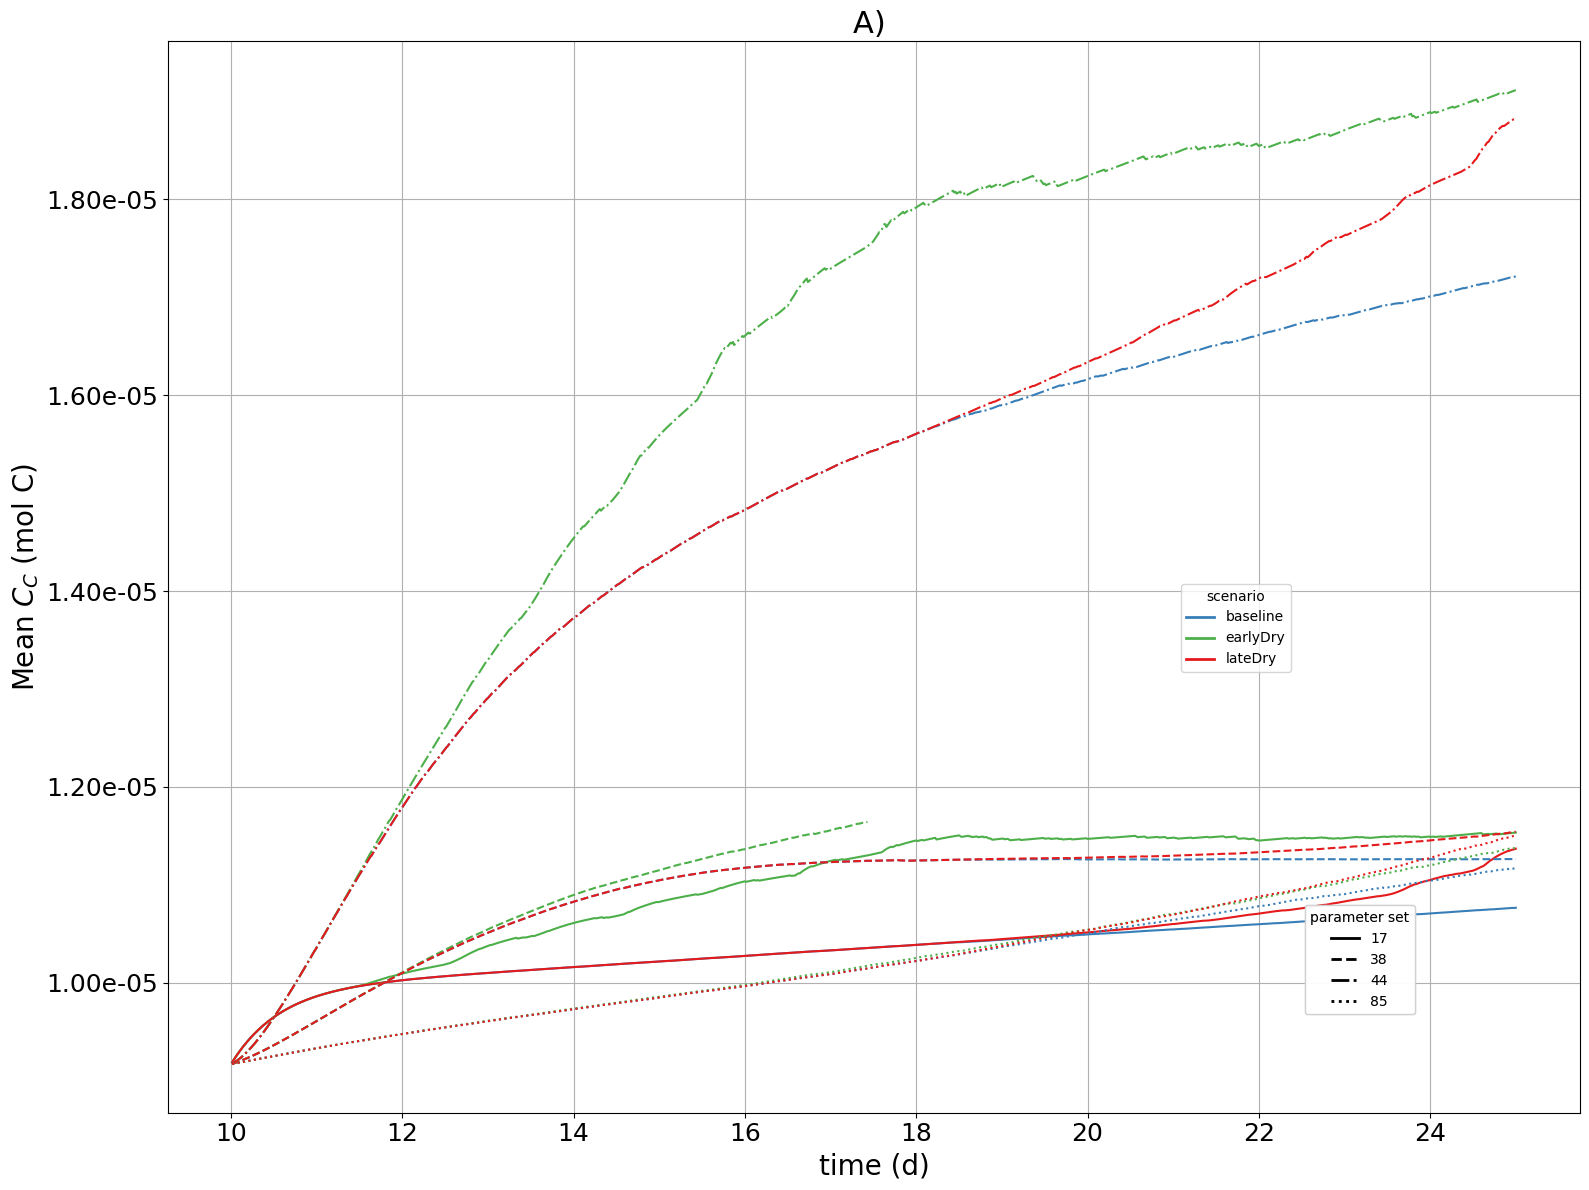

In [325]:

xlabels = {'cc': '$C_C$'}  
plt.figure(figsize=(8*2, 6*2))
bin_and_plottime(completedf, 'time', 'cc', 
            1,1,1,  doLogY=False, 
             #doLogX=True, 
             #colVar= colvars, 
             unit = 'mol C',
            xlabels=xlabels)
    
plt.savefig('co2vstime.png')
plt.show()

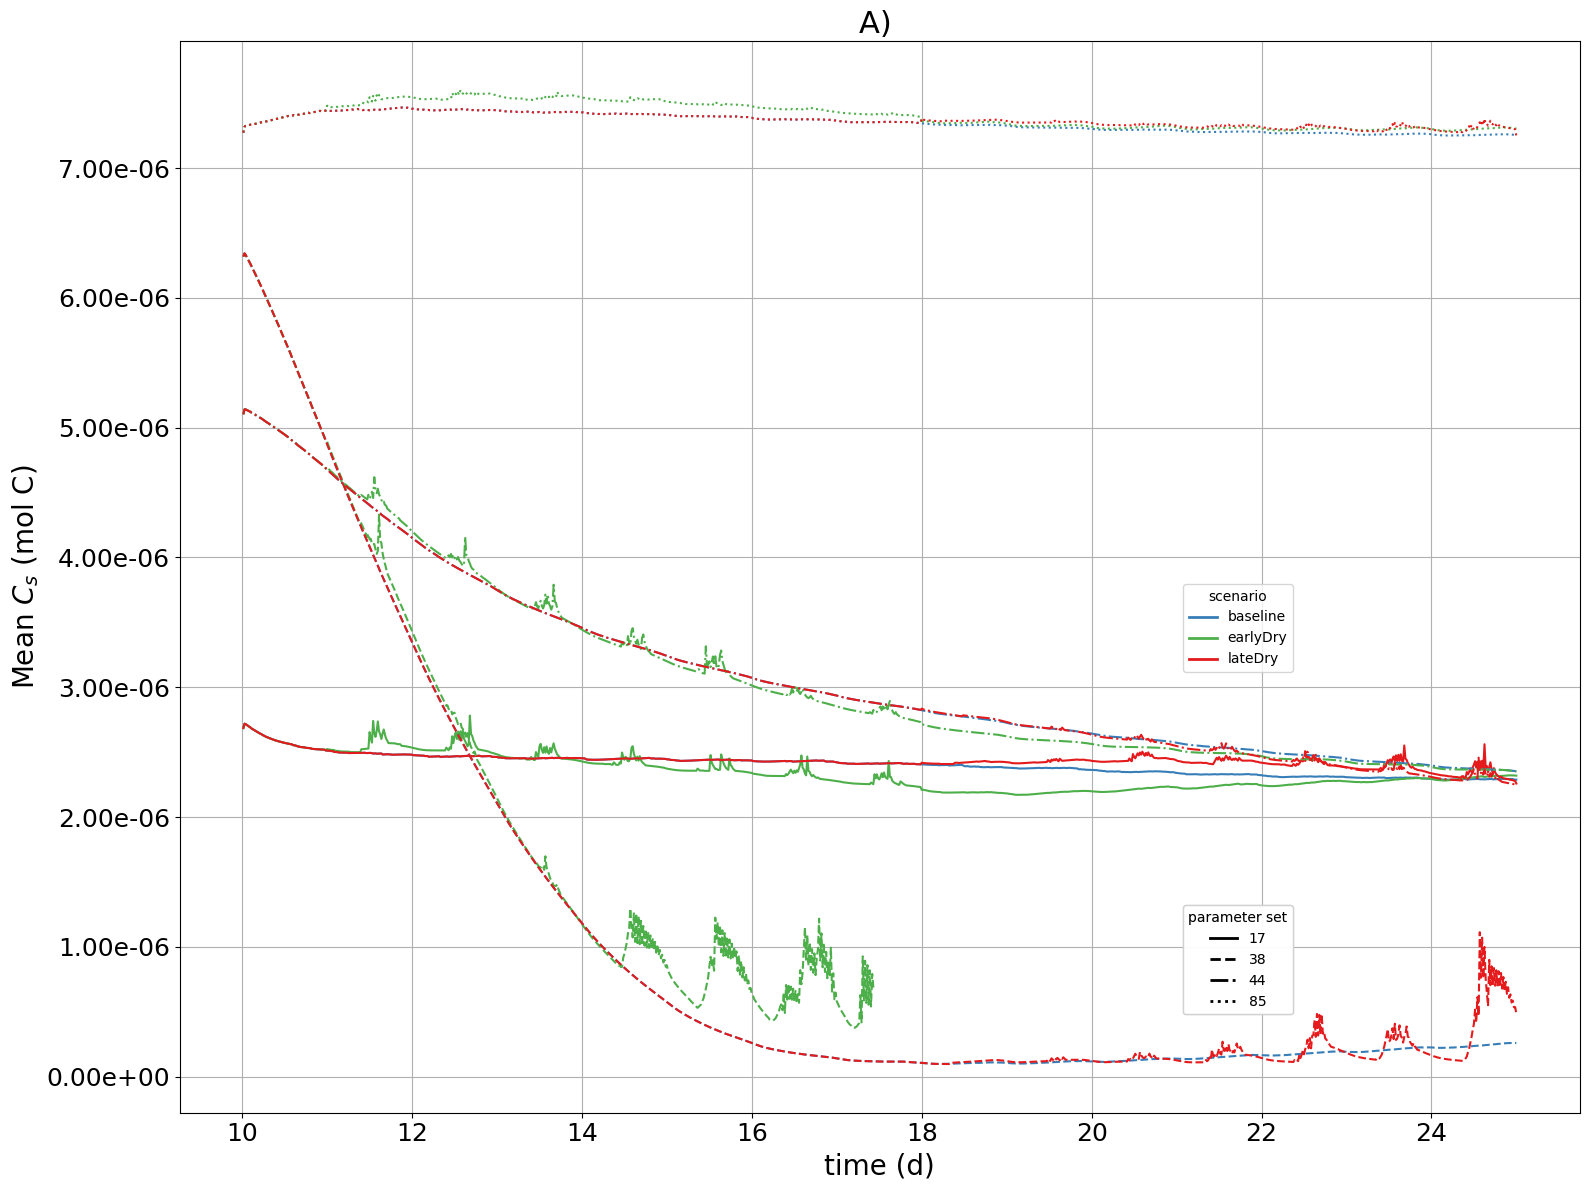

In [326]:

xlabels = {'cs': '$C_s$'}  
plt.figure(figsize=(8*2, 6*2))
bin_and_plottime(completedf, 'time', 'cs', 
            1,1,1,  doLogY=False, 
             #doLogX=True, 
             #colVar= colvars, 
             unit = 'mol C',
            xlabels=xlabels)
    
plt.savefig('co2vstime.png')
plt.show()

In [355]:
df

time  cellindx           co2
0        10.013889         0  1.666495e-08
1        10.027778         0  3.328491e-08
2        10.041667         0  4.986122e-08
3        10.055556         0  6.639405e-08
4        10.069444         0  8.288359e-08
...            ...       ...           ...
1594075  24.944444      1475  8.622203e-06
1594076  24.958333      1475  8.627745e-06
1594077  24.972222      1475  8.633287e-06
1594078  24.986111      1475  8.638827e-06
1594079  25.000000      1475  8.644243e-06

[1594080 rows x 3 columns]

In [356]:
completedf

time  cellindx     theta        cs        cl           coa  \
0         10.013889         0  0.244982  0.000003  0.000842  8.880318e-07   
1         10.027778         0  0.244982  0.000003  0.000842  8.592673e-07   
2         10.041667         0  0.244982  0.000003  0.000842  8.316357e-07   
3         10.055556         0  0.244982  0.000003  0.000842  8.051058e-07   
4         10.069444         0  0.244982  0.000003  0.000842  7.796333e-07   
...             ...       ...       ...       ...       ...           ...   
18324535  24.944444      1475  0.132176  0.000007  0.001168  6.062526e-07   
18324536  24.958333      1475  0.132155  0.000007  0.001168  6.060396e-07   
18324537  24.972222      1475  0.132135  0.000007  0.001168  6.058266e-07   
18324538  24.986111      1475  0.132114  0.000007  0.001168  6.056138e-07   
18324539  25.000000      1475  0.212616  0.000007  0.000726  6.053800e-07   

               cod           cca       ccd       css  ...   gotR  pSet  \
0         0.000008  8.143304e-07  0.000008  0.000067  ...  False    17   
1         0.000008  7.956794e-07  0.000008  0.000067  ...  False    17   
2         0.000008  7.774558e-07  0.000008  0.000067  ...  False    17   
3         0.000008  7.596515e-07  0.000008  0.000066  ...  False    17   
4         0.000008  7.422576e-07  0.000009  0.000066  ...  False    17   
...            ...           ...       ...       ...  ...    ...   ...   
18324535  0.000009  2.705677e-07  0.000010  0.000159  ...  False    85   
18324536  0.000009  2.705405e-07  0.000010  0.000159  ...  False    85   
18324537  0.000009  2.705134e-07  0.000010  0.000159  ...  False    85   
18324538  0.000009  2.704864e-07  0.000010  0.000159  ...  False    85   
18324539  0.000009  2.702984e-07  0.000010  0.000159  ...  False    85   

          scenario  depth coordX  coordY   simulation  volscv        cc  \
0         earlyDry  -40.5   -1.0    -5.5  17_earlyDry       1  0.000009   
1         earlyDry  -40.5   -1.0    -5.5  17_earlyDry       1  0.000009   
2         earlyDry  -40.5   -1.0    -5.5  17_earlyDry       1  0.000009   
3         earlyDry  -40.5   -1.0    -5.5  17_earlyDry       1  0.000009   
4         earlyDry  -40.5   -1.0    -5.5  17_earlyDry       1  0.000009   
...            ...    ...    ...     ...          ...     ...       ...   
18324535   lateDry   -0.5    1.0     5.5   85_lateDry       1  0.000010   
18324536   lateDry   -0.5    1.0     5.5   85_lateDry       1  0.000010   
18324537   lateDry   -0.5    1.0     5.5   85_lateDry       1  0.000010   
18324538   lateDry   -0.5    1.0     5.5   85_lateDry       1  0.000010   
18324539   lateDry   -0.5    1.0     5.5   85_lateDry       1  0.000010   

                co  
0         0.000009  
1         0.000009  
2         0.000009  
3         0.000009  
4         0.000009  
...            ...  
18324535  0.000009  
18324536  0.000009  
18324537  0.000009  
18324538  0.000009  
18324539  0.000009  

[18324540 rows x 22 columns]

In [7]:
completedf25 = completedf[(completedf['time'].astype(int) == 25)&(completedf['gotR'])]

In [8]:
completedf25.to_pickle('./soil3dData25gotR.pkl')

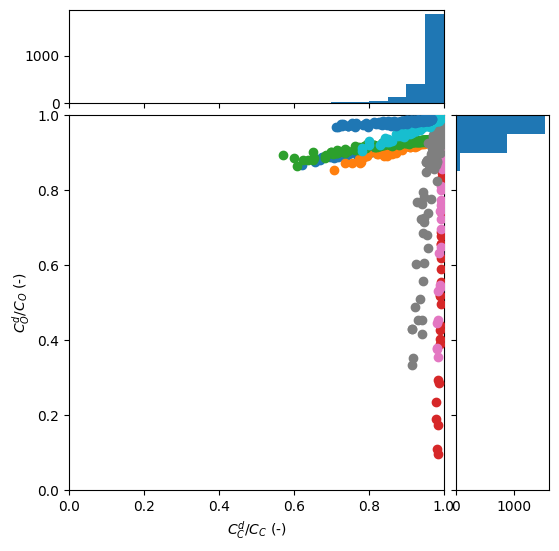

In [17]:
def scatter_hist(df,ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    for vall in df['simulation'].unique():#pSet2Keep:
        df_ = df[df['simulation']== vall].copy()
        
        is5x = df_['ccd']/df_['cc']#x[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        is5y = df_['cod']/df_['co']#
        
        ax.scatter(is5x, is5y, alpha=1, 
                    zorder=100,label=f'{vall}'#color_map[value]
                   )
        
    # now determine nice limits by hand:
    x= df['ccd']/df['cc']
    y= df['cod']/df['co']
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    #ax.legend( bbox_to_anchor=(1.7, 1))
    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# Start with a square Figure.


fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#plt.title(chr(ord('@')+2)+") ")
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel('$C_C^d/C_C$ (-)')
ax.set_ylabel('$C_O^d/C_O$ (-)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Draw the scatter plot and marginals.
scatter_hist(completedf25, ax, ax_histx, 
             ax_histy)

In [13]:
for val in completedf25["simulation"].drop_duplicates():
    print (val)

85_earlyDry
85_baseline
85_lateDry
17_baseline
38_baseline
44_baseline
17_earlyDry
17_lateDry
44_earlyDry
38_lateDry
44_lateDry


In [14]:
for val in completedf25["simulation"].unique():
    print (val)

85_earlyDry
85_baseline
85_lateDry
17_baseline
38_baseline
44_baseline
17_earlyDry
17_lateDry
44_earlyDry
38_lateDry
44_lateDry
